In [1]:
!pip install nsepy

In [2]:
from nsepy import get_history
from datetime import date
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [4]:
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import lag_plot

In [5]:
start_date_R = date(2012, 10, 1)
end_date_R = date(2022,10,15)

Reliance = get_history(symbol = 'RELIANCE', start = start_date_R, end = end_date_R)
Reliance

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-10-01,RELIANCE,EQ,837.20,840.00,842.30,829.25,834.10,833.50,834.99,1991469,1.662860e+14,49735,972193,0.4882
2012-10-03,RELIANCE,EQ,833.50,834.45,853.45,834.25,847.45,846.10,845.93,5006639,4.235262e+14,110536,2908157,0.5809
2012-10-04,RELIANCE,EQ,846.10,850.55,858.90,849.10,852.00,852.90,853.87,2886232,2.464463e+14,70943,1522797,0.5276
2012-10-05,RELIANCE,EQ,852.90,859.90,862.00,682.35,859.55,857.80,846.95,3592138,3.042348e+14,60282,1052935,0.2931
2012-10-08,RELIANCE,EQ,857.80,854.55,854.55,816.25,817.00,819.40,828.39,4775793,3.956202e+14,96671,2860535,0.5990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10,RELIANCE,EQ,2432.35,2405.00,2417.60,2388.00,2407.00,2405.80,2403.20,2921076,7.019928e+14,136725,1453561,0.4976
2022-10-11,RELIANCE,EQ,2405.80,2414.00,2414.00,2351.10,2353.55,2357.90,2377.84,4252803,1.011249e+15,197213,2480007,0.5831
2022-10-12,RELIANCE,EQ,2357.90,2352.00,2381.70,2343.10,2377.00,2375.25,2368.06,3422992,8.105861e+14,158484,1914563,0.5593


### EDA ON RELIANCE

In [6]:
Reliance

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-10-01,RELIANCE,EQ,837.20,840.00,842.30,829.25,834.10,833.50,834.99,1991469,1.662860e+14,49735,972193,0.4882
2012-10-03,RELIANCE,EQ,833.50,834.45,853.45,834.25,847.45,846.10,845.93,5006639,4.235262e+14,110536,2908157,0.5809
2012-10-04,RELIANCE,EQ,846.10,850.55,858.90,849.10,852.00,852.90,853.87,2886232,2.464463e+14,70943,1522797,0.5276
2012-10-05,RELIANCE,EQ,852.90,859.90,862.00,682.35,859.55,857.80,846.95,3592138,3.042348e+14,60282,1052935,0.2931
2012-10-08,RELIANCE,EQ,857.80,854.55,854.55,816.25,817.00,819.40,828.39,4775793,3.956202e+14,96671,2860535,0.5990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10,RELIANCE,EQ,2432.35,2405.00,2417.60,2388.00,2407.00,2405.80,2403.20,2921076,7.019928e+14,136725,1453561,0.4976
2022-10-11,RELIANCE,EQ,2405.80,2414.00,2414.00,2351.10,2353.55,2357.90,2377.84,4252803,1.011249e+15,197213,2480007,0.5831
2022-10-12,RELIANCE,EQ,2357.90,2352.00,2381.70,2343.10,2377.00,2375.25,2368.06,3422992,8.105861e+14,158484,1914563,0.5593


In [7]:
R_Close = pd.DataFrame(Reliance['Close'])
R_Close

,Close
Date,
2012-10-01,833.50
2012-10-03,846.10
2012-10-04,852.90
2012-10-05,857.80
2012-10-08,819.40
...,...
2022-10-10,2405.80
2022-10-11,2357.90
2022-10-12,2375.25


In [8]:
Reliance.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2.484000e+03,2.484000e+03,2.484000e+03,2.484000e+03,2484.000000
mean,1337.456240,1339.125543,1354.283233,1323.339956,1337.962359,1338.073591,1339.023442,6.784734e+06,1.020033e+15,1.661596e+05,3.009785e+06,0.496214
std,560.627401,561.488811,567.868295,554.738031,560.929127,560.920560,561.266770,6.285074e+06,1.197476e+15,1.357436e+05,2.152832e+06,0.120963
min,765.350000,766.000000,773.700000,682.350000,763.200000,765.350000,766.600000,1.110540e+05,9.037442e+12,3.338000e+03,3.174100e+04,0.114800
25%,920.400000,921.950000,931.187500,913.000000,920.412500,920.700000,922.022500,3.027037e+06,2.903924e+14,7.841225e+04,1.636553e+06,0.418050
50%,1062.825000,1063.925000,1075.450000,1048.675000,1062.550000,1063.125000,1061.135000,4.861845e+06,5.852769e+14,1.219845e+05,2.429273e+06,0.508100
75%,1570.237500,1572.000000,1584.237500,1556.237500,1573.462500,1571.587500,1569.105000,8.119365e+06,1.319023e+15,2.124328e+05,3.671275e+06,0.581125
max,2819.850000,2856.150000,2856.150000,2786.100000,2810.000000,2819.850000,2823.910000,6.523089e+07,1.473434e+16,1.428490e+06,1.973411e+07,0.832700


In [9]:
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 2012-10-01 to 2022-10-14
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2484 non-null   object 
 1   Series              2484 non-null   object 
 2   Prev Close          2484 non-null   float64
 3   Open                2484 non-null   float64
 4   High                2484 non-null   float64
 5   Low                 2484 non-null   float64
 6   Last                2484 non-null   float64
 7   Close               2484 non-null   float64
 8   VWAP                2484 non-null   float64
 9   Volume              2484 non-null   int64  
 10  Turnover            2484 non-null   float64
 11  Trades              2484 non-null   int64  
 12  Deliverable Volume  2484 non-null   int64  
 13  %Deliverble         2484 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 291.1+ KB


In [10]:
Reliance.shape

(2484, 14)

In [11]:
Reliance.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [12]:
Reliance.reset_index(inplace = True)

Reliance['Date'] = pd.to_datetime(Reliance['Date'])

Reliance.set_index('Date', inplace = True)
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2012-10-01 to 2022-10-14
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2484 non-null   object 
 1   Series              2484 non-null   object 
 2   Prev Close          2484 non-null   float64
 3   Open                2484 non-null   float64
 4   High                2484 non-null   float64
 5   Low                 2484 non-null   float64
 6   Last                2484 non-null   float64
 7   Close               2484 non-null   float64
 8   VWAP                2484 non-null   float64
 9   Volume              2484 non-null   int64  
 10  Turnover            2484 non-null   float64
 11  Trades              2484 non-null   int64  
 12  Deliverable Volume  2484 non-null   int64  
 13  %Deliverble         2484 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 291.1+ KB


C:\Users\Shriprada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

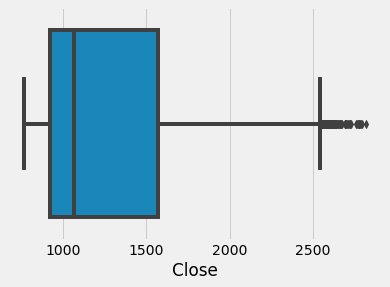

In [13]:
sns.boxplot(Reliance['Close'])

C:\Users\Shriprada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

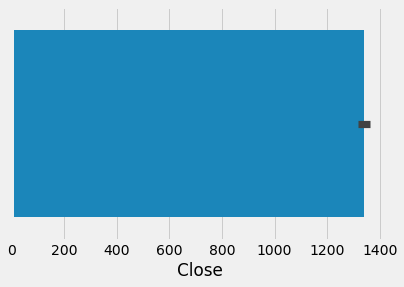

In [14]:
sns.barplot(Reliance['Close'])

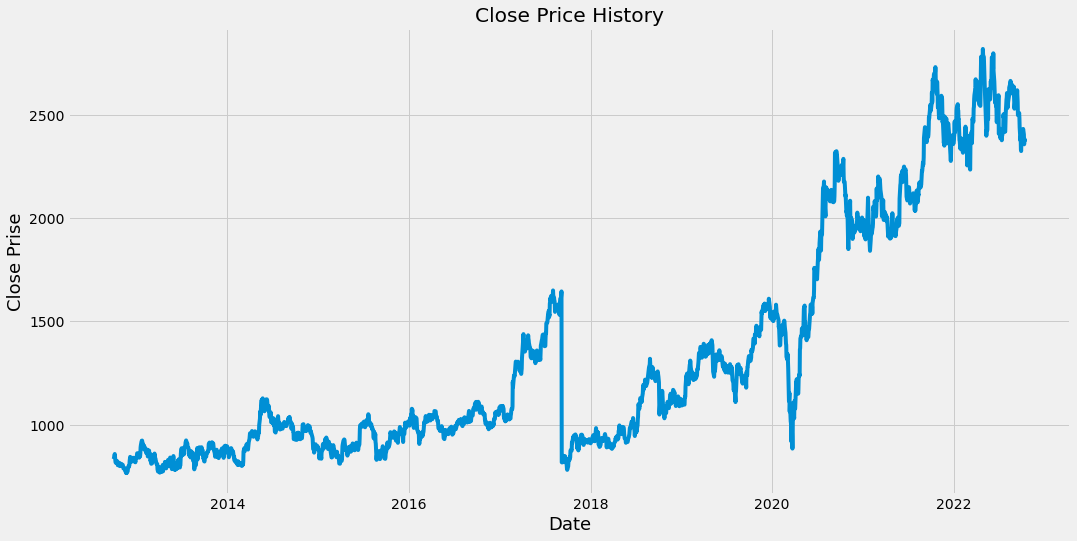

In [15]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(R_Close)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Prise', fontsize = 18)
plt.show()

In [16]:
ma100_R = Reliance.Close.rolling(100).mean()
ma100_R

Date
2012-10-01          NaN
2012-10-03          NaN
2012-10-04          NaN
2012-10-05          NaN
2012-10-08          NaN
                ...    
2022-10-10    2541.0080
2022-10-11    2539.2035
2022-10-12    2538.1575
2022-10-13    2535.7410
2022-10-14    2533.3790
Name: Close, Length: 2484, dtype: float64

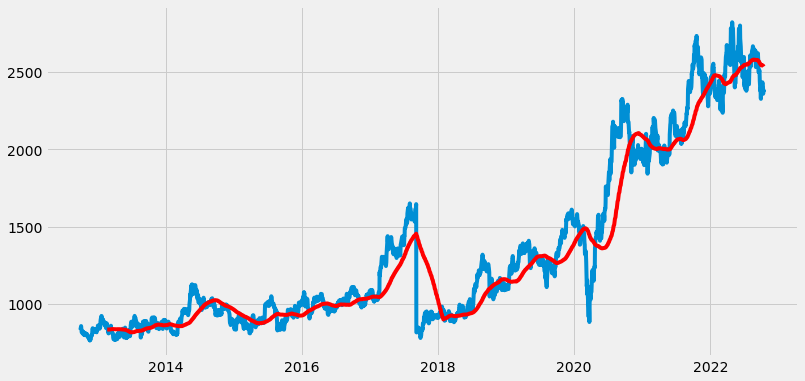

In [17]:
plt.figure(figsize=(12,6))
plt.plot(Reliance.Close)
plt.plot(ma100_R, 'r')

(array([862., 547., 290., 180.,  36., 104., 147., 119., 141.,  58.]),
 array([ 765.35,  970.8 , 1176.25, 1381.7 , 1587.15, 1792.6 , 1998.05,
        2203.5 , 2408.95, 2614.4 , 2819.85]),
 <BarContainer object of 10 artists>)

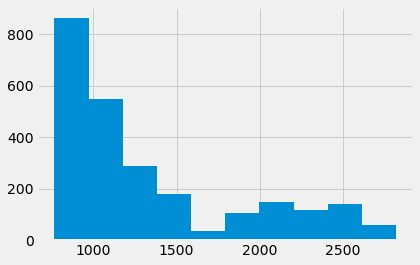

In [18]:
plt.hist(R_Close, bins =10)

<AxesSubplot:ylabel='Density'>

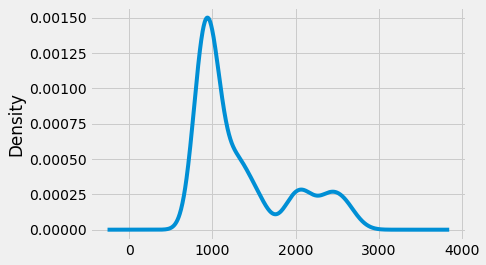

In [19]:
Reliance['Close'].plot(kind = 'kde')

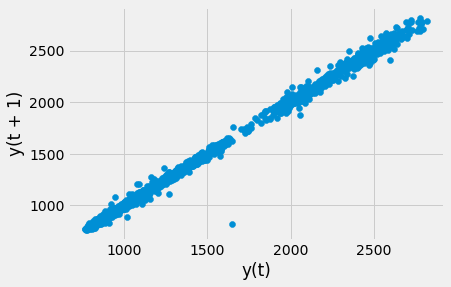

In [20]:
lag_plot(R_Close)
pyplot.show()

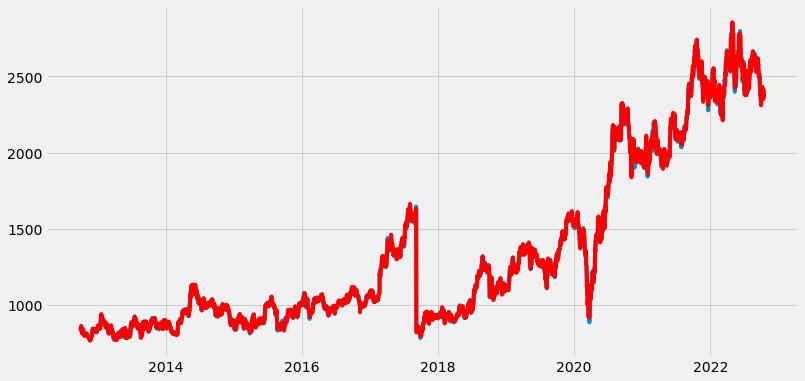

In [21]:
plt.figure(figsize=(12,6))
plt.plot(Reliance.Close)
plt.plot(Reliance.Open, 'r')

<AxesSubplot:>

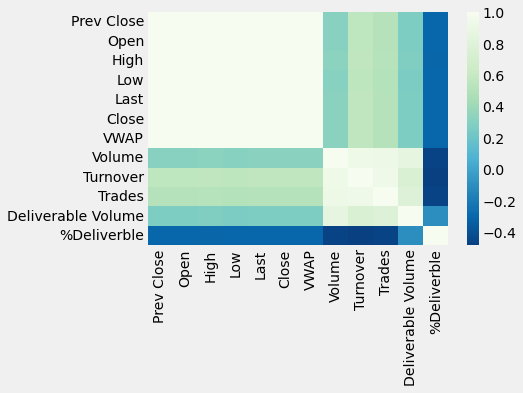

In [22]:
sns.heatmap(Reliance.corr(), cmap = "GnBu_r")

<Figure size 432x288 with 0 Axes>

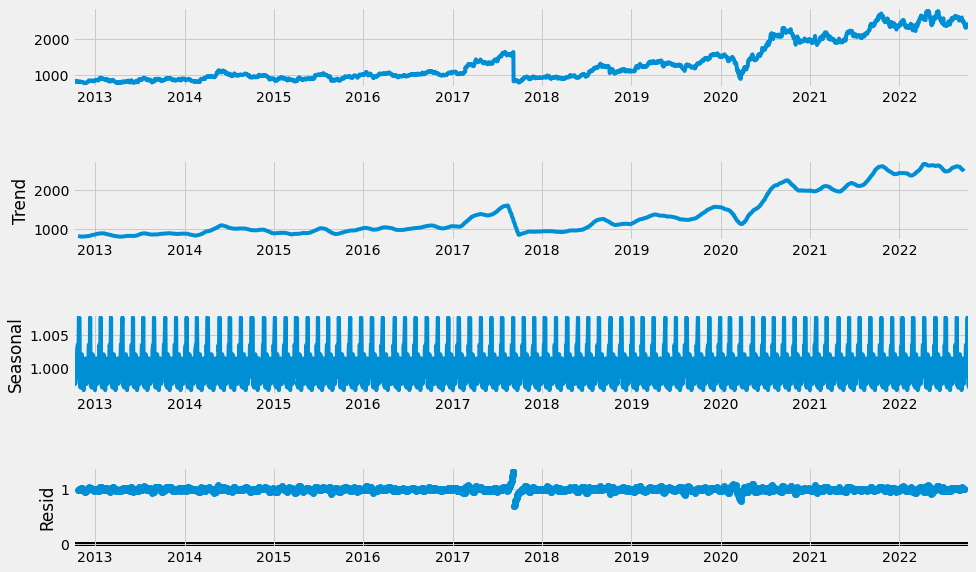

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(R_Close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Text(0.5, 1.0, 'Wipro Cumulative Returns')

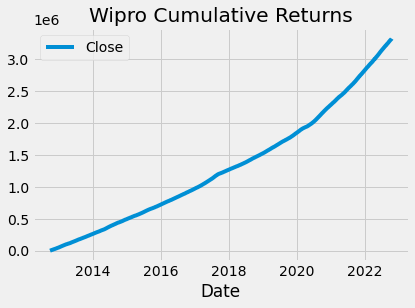

In [24]:
R_cumsum = R_Close.cumsum()
R_cumsum.plot()
plt.title('Wipro Cumulative Returns')

<AxesSubplot:xlabel='Date'>

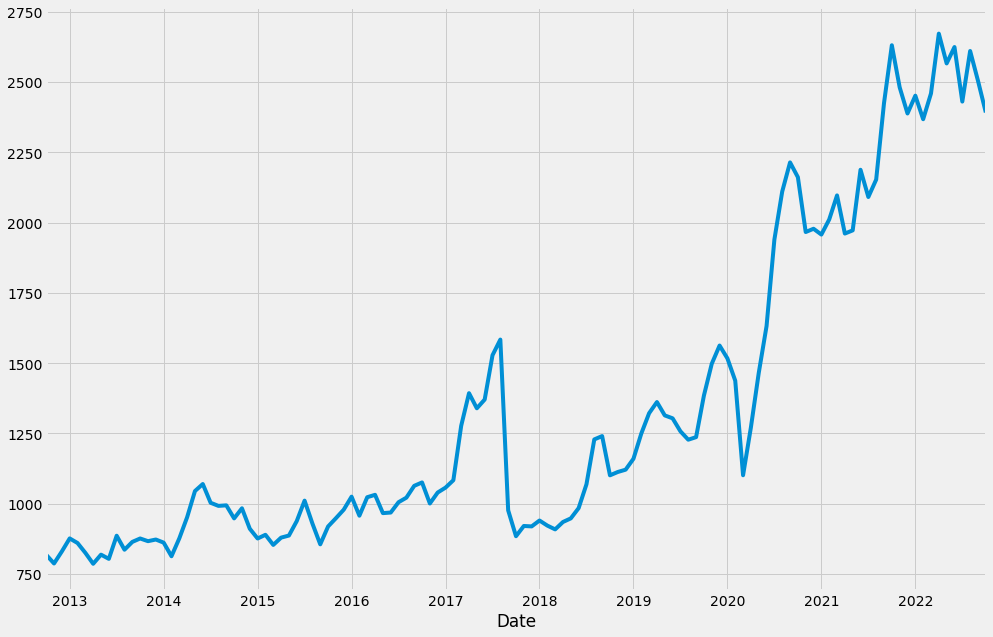

In [25]:
Reliance['Close'].resample(rule='M').mean().plot(figsize=(15,10))

In [26]:
R = Reliance.drop(columns =['Symbol', 'Series','VWAP','Volume','Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'])
R

,Prev Close,Open,High,Low,Last,Close
Date,,,,,,
2012-10-01,837.20,840.00,842.30,829.25,834.10,833.50
2012-10-03,833.50,834.45,853.45,834.25,847.45,846.10
2012-10-04,846.10,850.55,858.90,849.10,852.00,852.90
2012-10-05,852.90,859.90,862.00,682.35,859.55,857.80
2012-10-08,857.80,854.55,854.55,816.25,817.00,819.40
...,...,...,...,...,...,...
2022-10-10,2432.35,2405.00,2417.60,2388.00,2407.00,2405.80
2022-10-11,2405.80,2414.00,2414.00,2351.10,2353.55,2357.90
2022-10-12,2357.90,2352.00,2381.70,2343.10,2377.00,2375.25


## Modelling

C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


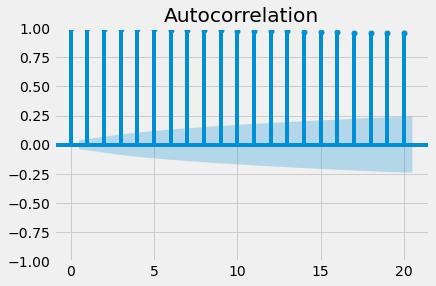

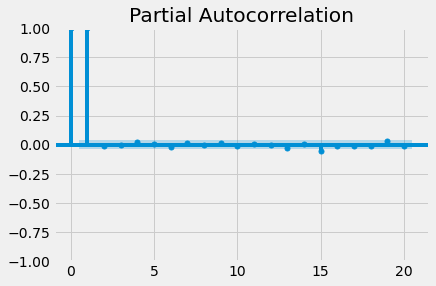

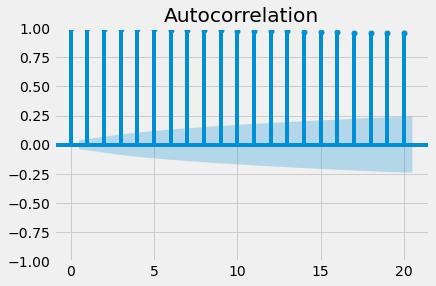

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(R_Close.squeeze(), lags = 20)
plot_acf(R_Close.squeeze(), lags = 20)

## Splitting Data into Train and Test

In [28]:
split_point = len(R_Close) - 365
train_R = R_Close[0:split_point]
test_R = R_Close[split_point:]

In [29]:
train_R.shape

(2119, 1)

In [30]:
test_R.shape

(365, 1)

## Naive Bayes

In [31]:
sp =len(R) - 30
train_R1= R[0:sp]
test_R1 = R[sp:]

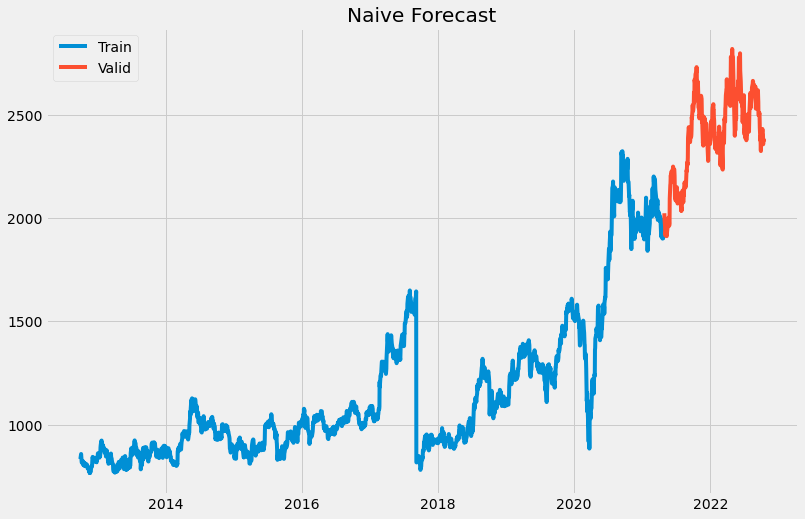

In [32]:
y_hat = test_R.copy() 
y_hat['naive'] = test_R 
plt.figure(figsize=(12,8)) 
plt.plot(train_R.index, train_R['Close'], label='Train') 
plt.plot(test_R.index,test_R['Close'], label='Valid') 
#plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

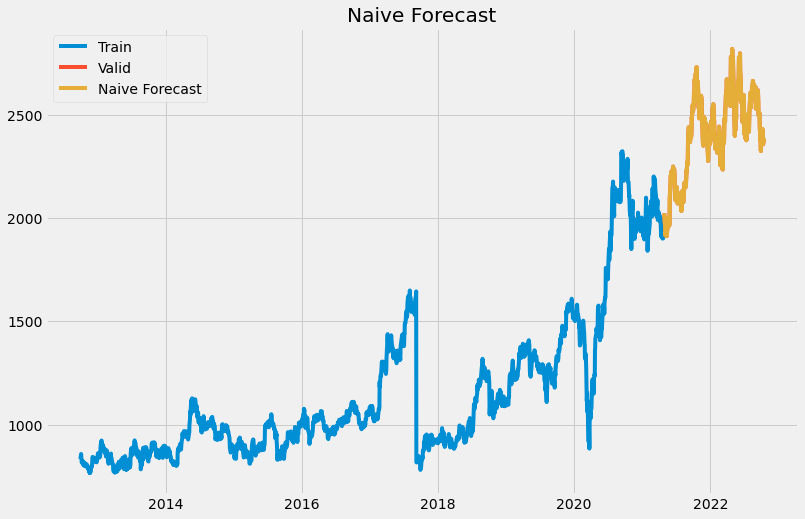

In [33]:
y_hat = test_R.copy() 
y_hat['naive'] = test_R 
plt.figure(figsize=(12,8)) 
plt.plot(train_R.index, train_R['Close'], label='Train') 
plt.plot(test_R.index,test_R['Close'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(test_R.Close, y_hat.naive)) 
print(rms)

0.0


In [35]:
colnames = R.columns

In [36]:
#2

x_train = train_R1[colnames[0:5]].values
y_train = train_R1[colnames[5]].values
x_test = test_R1[colnames[0:5]].values
y_test = test_R1[colnames[5]].values

In [37]:
def norm_func(i):
    x = (i-i.min())/(i.max() - i.min())
    return (x)

In [38]:
x_train = norm_func(x_train)
x_test = norm_func(x_test)

In [39]:
from sklearn.naive_bayes import MultinomialNB as MB

M_model = MB()
train_pred_multi = M_model.fit(x_train, y_train.astype('int')).predict(x_train)
test_pred_multi = M_model.fit(x_test, y_test.astype('int')).predict(x_test)

In [40]:
train_acc_multi = np.mean(train_pred_multi == y_train)
train_acc_multi

0.0

In [41]:
test_acc_multi = np.mean(test_pred_multi== y_test)
test_acc_multi

0.0

In [42]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train.astype('int')).predict(x_train)
test_pred_gau=G_model.fit(x_test,y_test.astype('int')).predict(x_test)

In [43]:
train_acc_gau = np.mean(train_pred_gau == y_train)
train_acc_gau

0.041157294213528935

In [44]:
test_acc_gau = np.mean(test_pred_gau == y_test)
test_acc_gau

0.0

## ARIMA

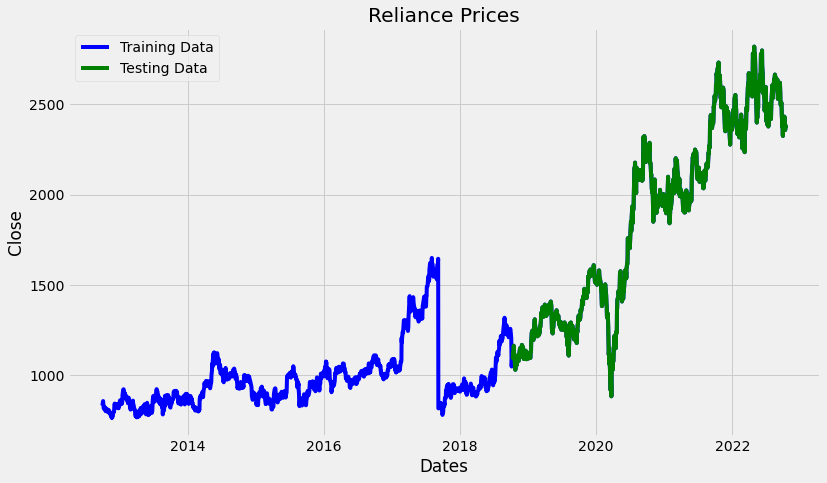

In [45]:
train_data, test_data = R[0:int(len(R)*0.6)], R[int(len(R)*0.6):]
plt.figure(figsize=(12,7))
plt.title('Reliance Prices')
plt.xlabel('Dates')
plt.ylabel('Close')
plt.plot(R['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()


In [46]:
def rel_val(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

### Augumented Dickey - Fuller test

#### Null hypothesis - The series is not stationary
#### Alternate hypothesis - The series is stationary

In [112]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(test_data['Close'])
print('ADF Statistics: %f' %result[0])
print('p-value:%f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key,value))

ADF Statistics: -1.395947
p-value:0.584218
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


### Here we see that p - value is more than 0.05. Hence our alternate hypothesis will be rejected . Thus this series is non-stationary.

<AxesSubplot:xlabel='Date'>

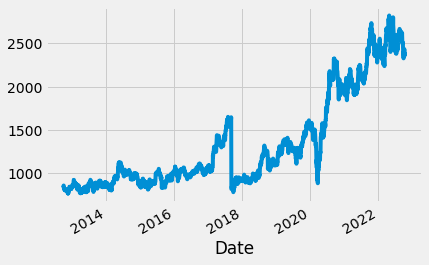

In [48]:
R['Close'].plot()

#### Finding d - parameter

In [49]:
plt.rcParams.update({'figure.figsize':(20,15),'figure.dpi':120})

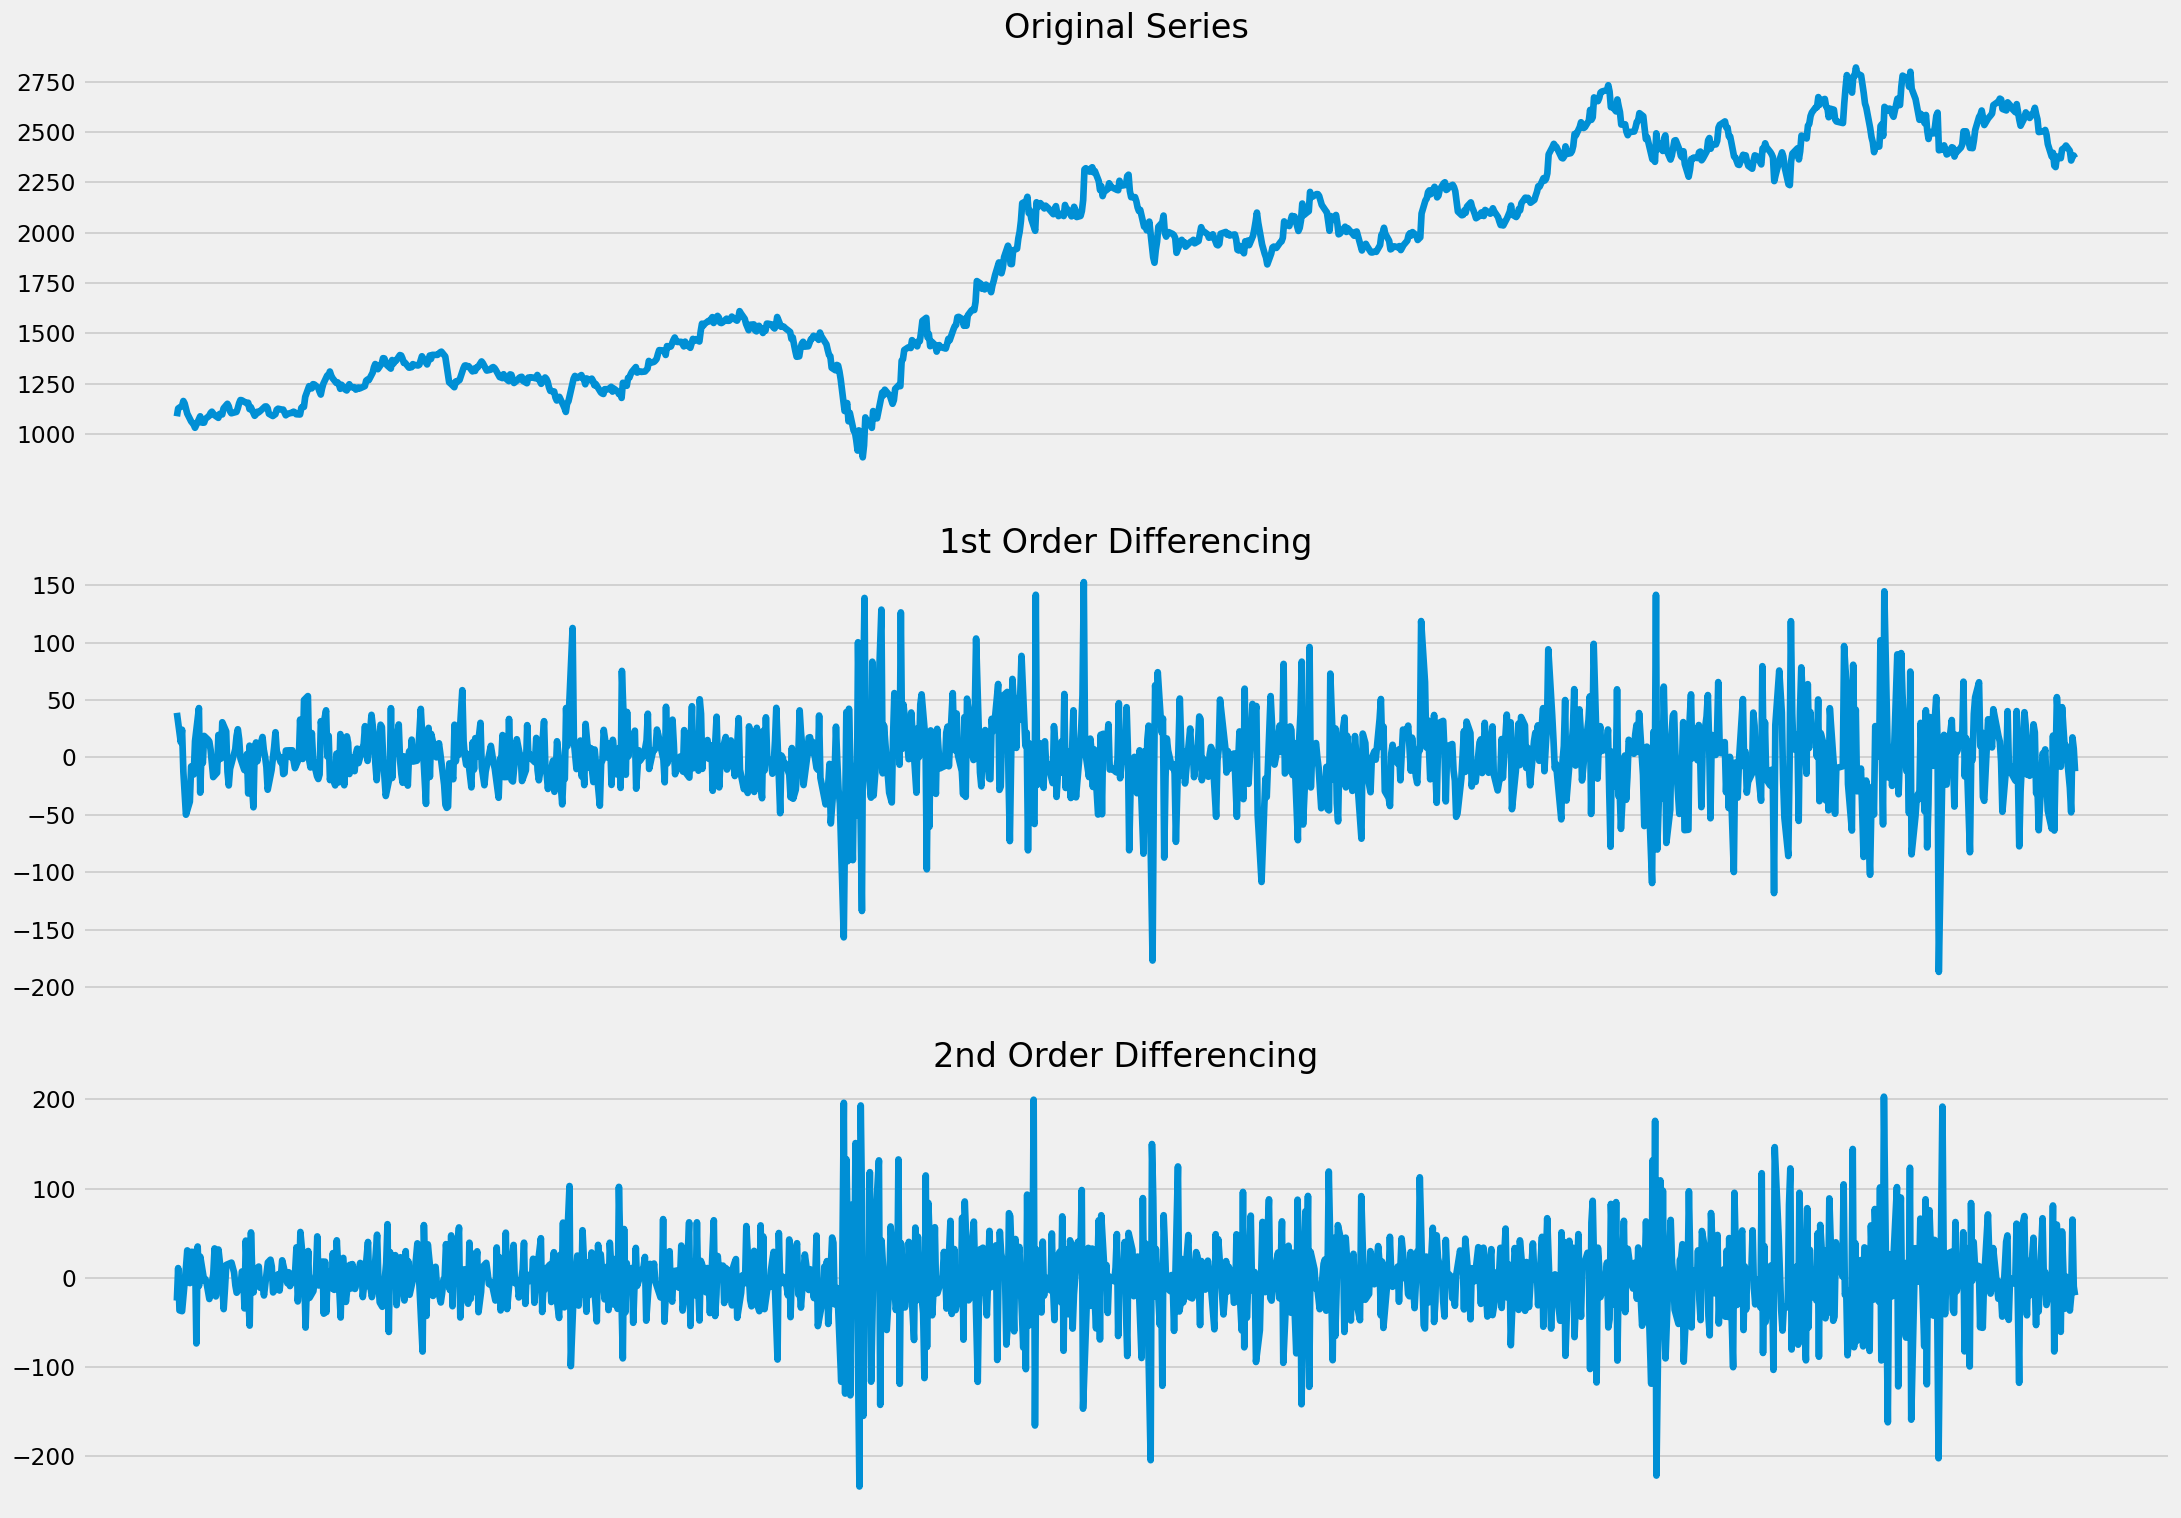

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(test_data.Close)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)

#1st Differencing
ax2.plot(test_data.Close.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)

#2nd Differencing
ax3.plot(test_data.Close.diff().diff())
ax3.set_title('2nd Order Differencing')
ax3.axes.xaxis.set_visible(False)

plt.show()

#### Since comparitively, second order differencing has lesser noice than first order, we consider d = 2.

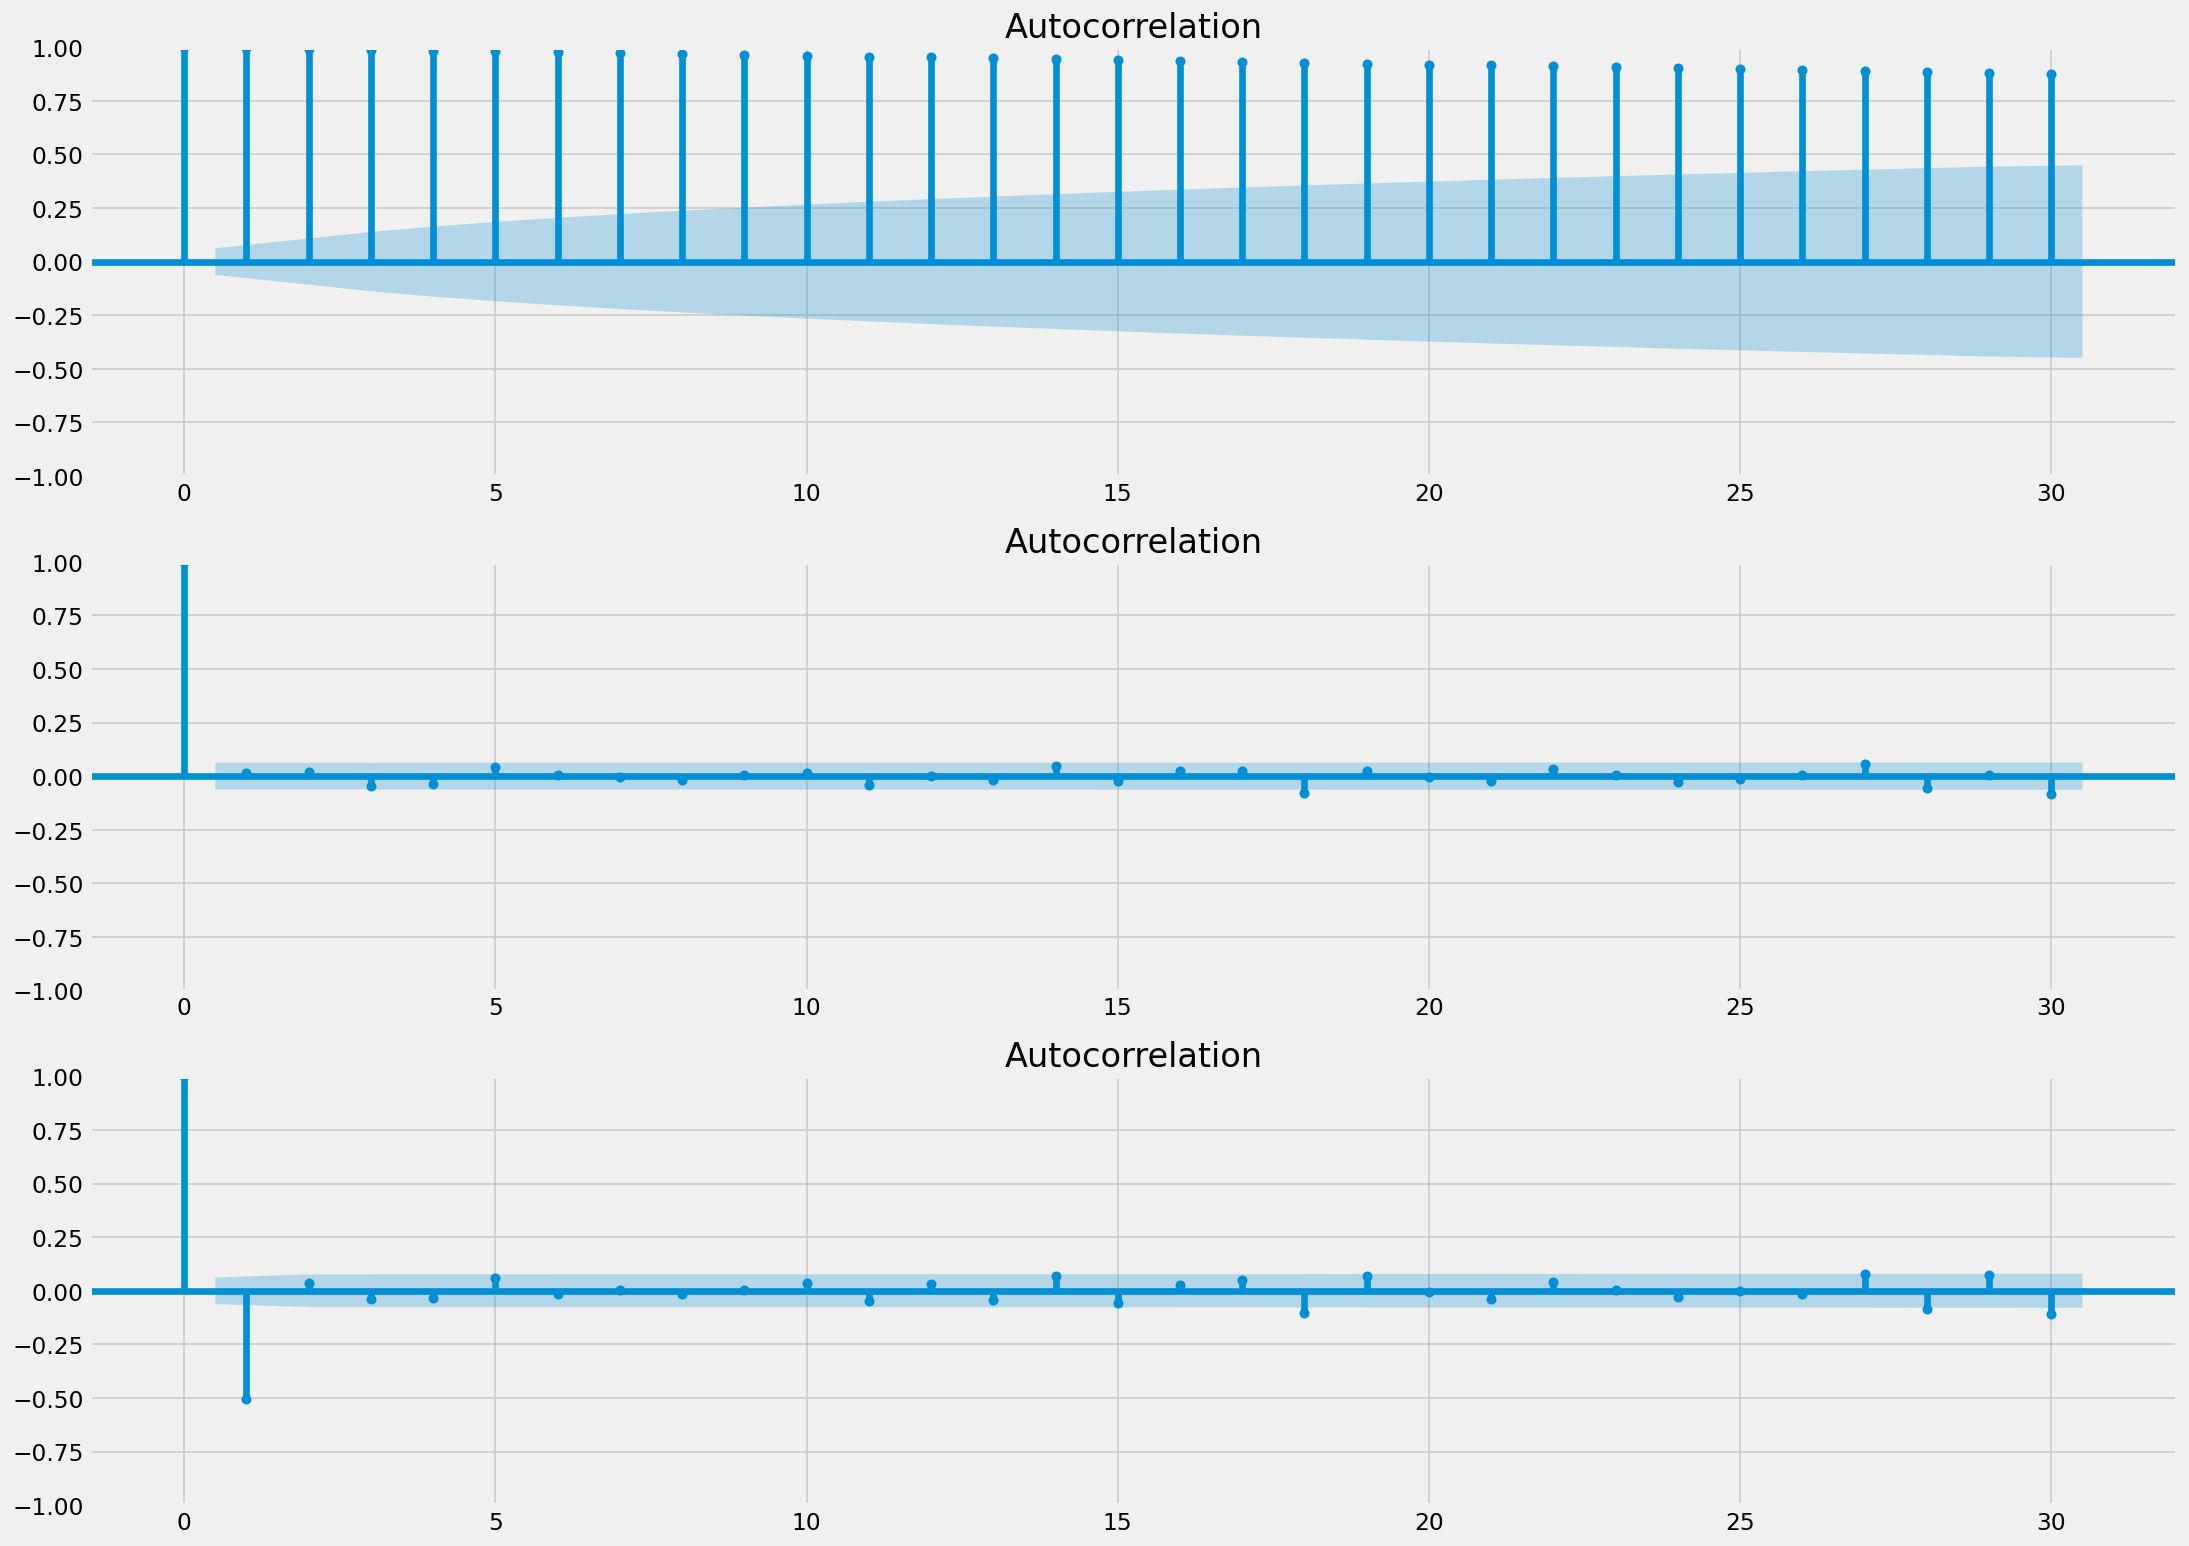

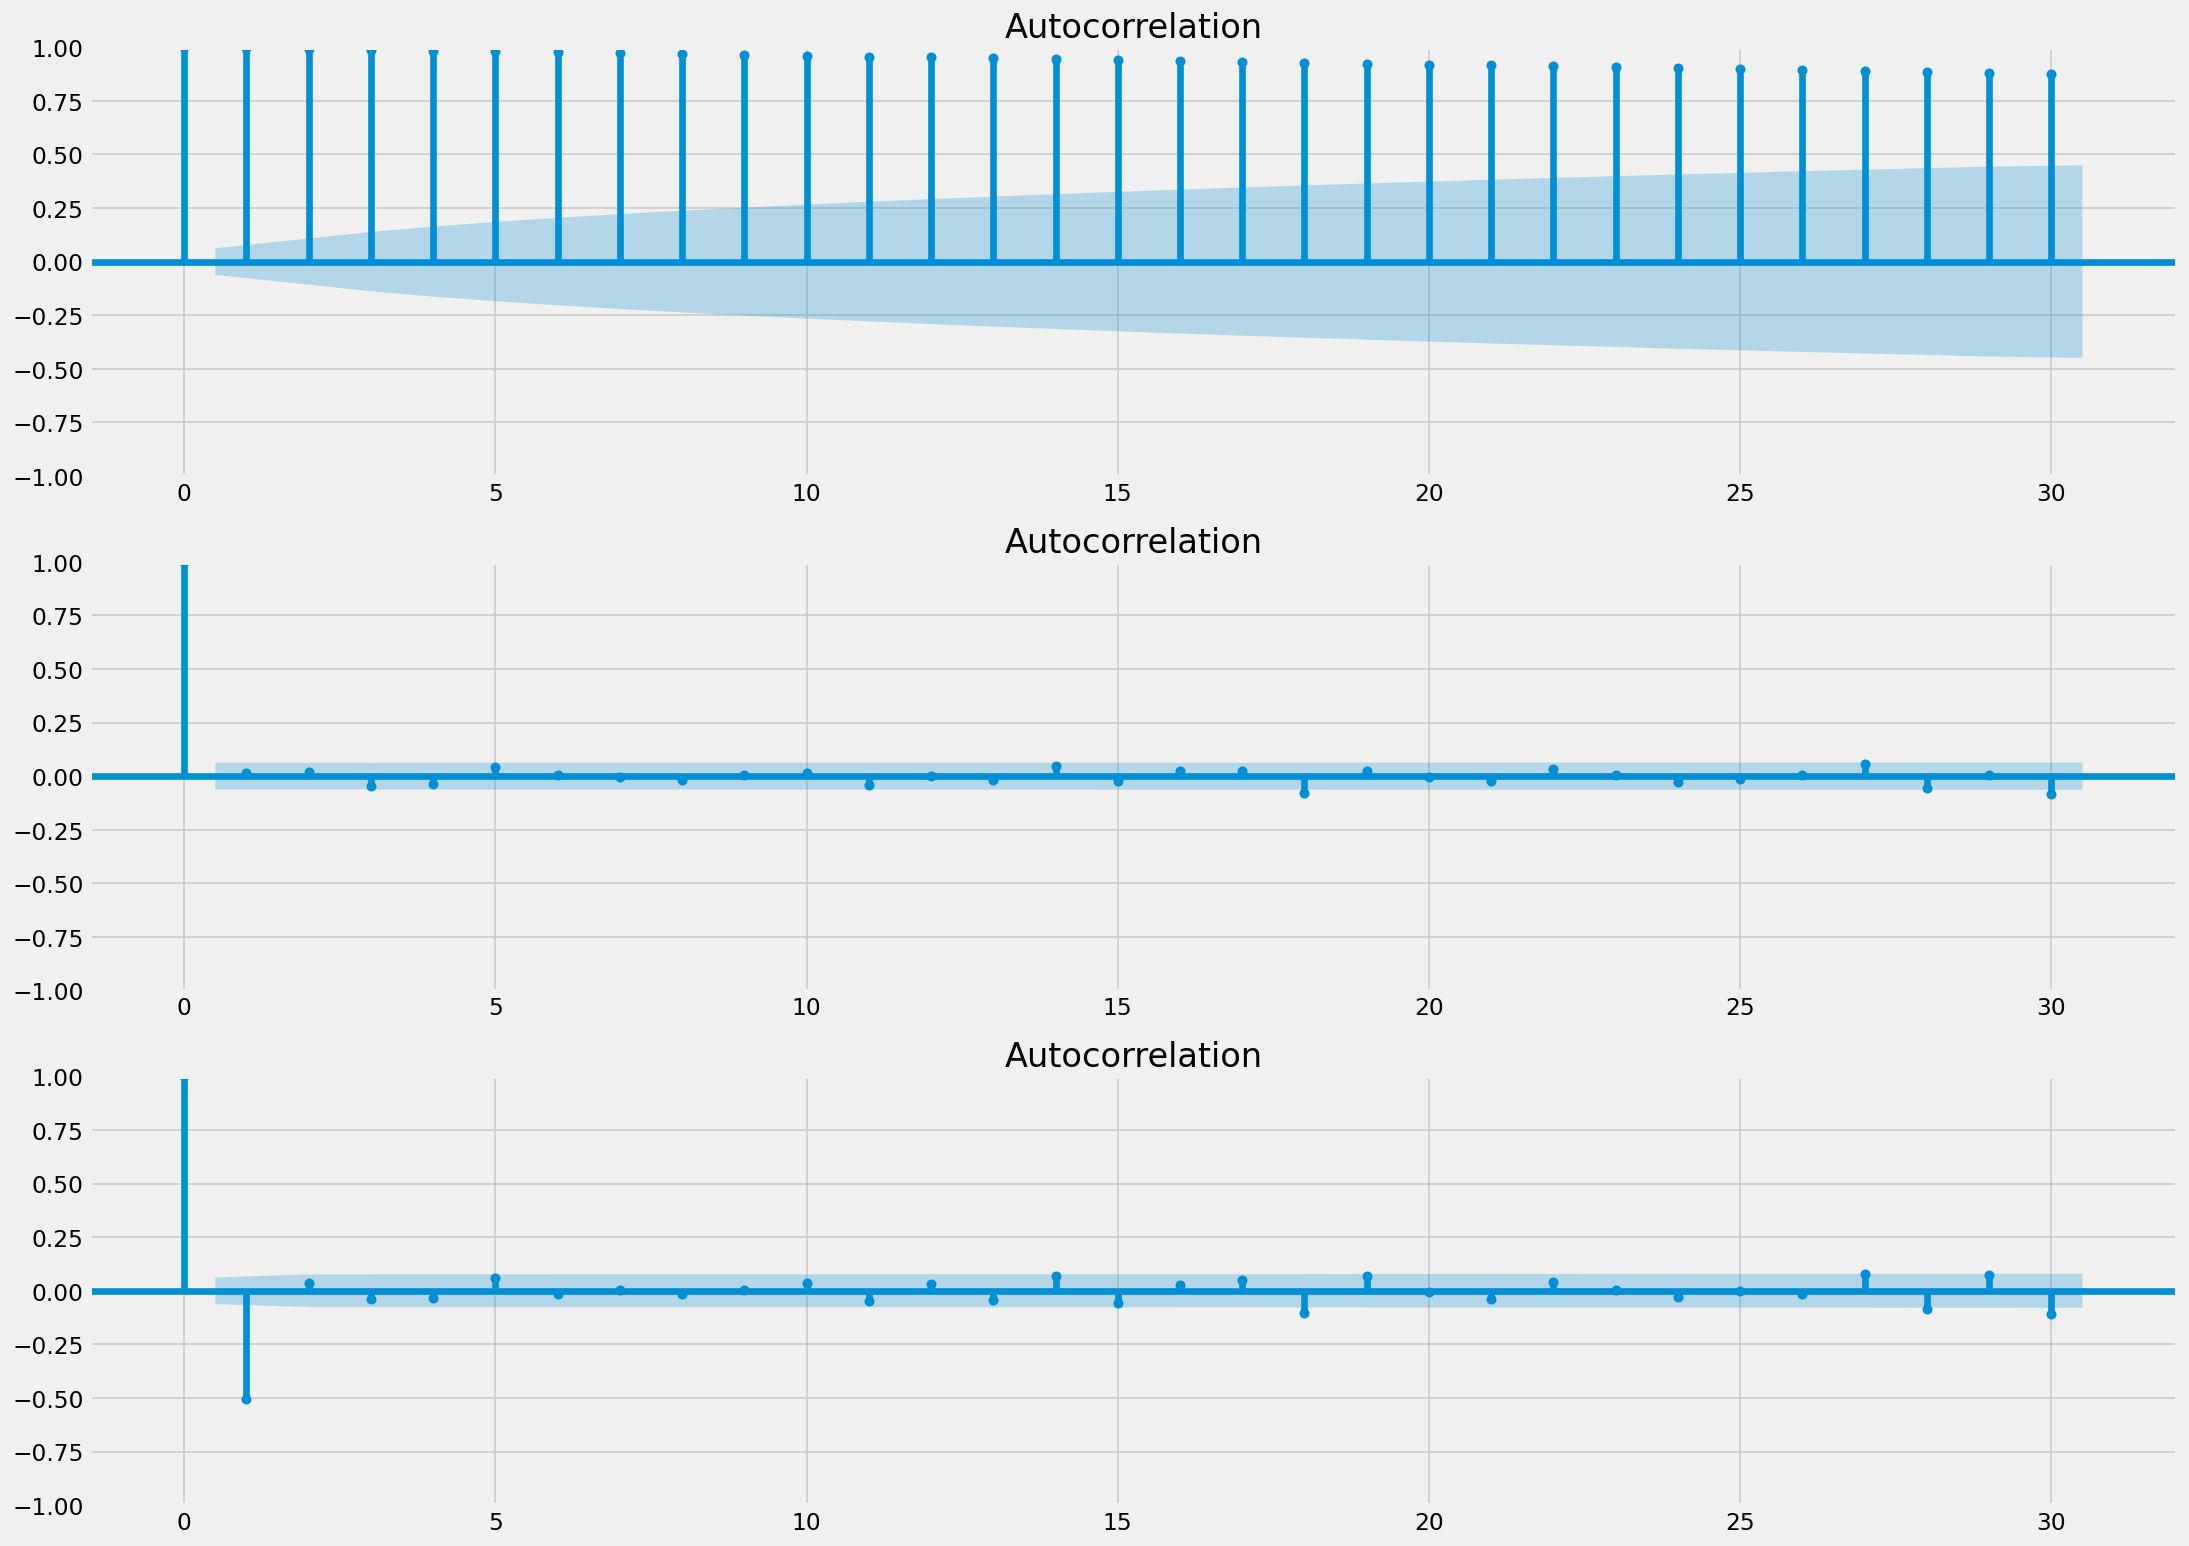

In [114]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(test_data.Close, ax=ax1)
plot_acf(test_data.Close.diff().dropna(), ax=ax2)
plot_acf(test_data.Close.diff().diff().dropna(), ax=ax3)

C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


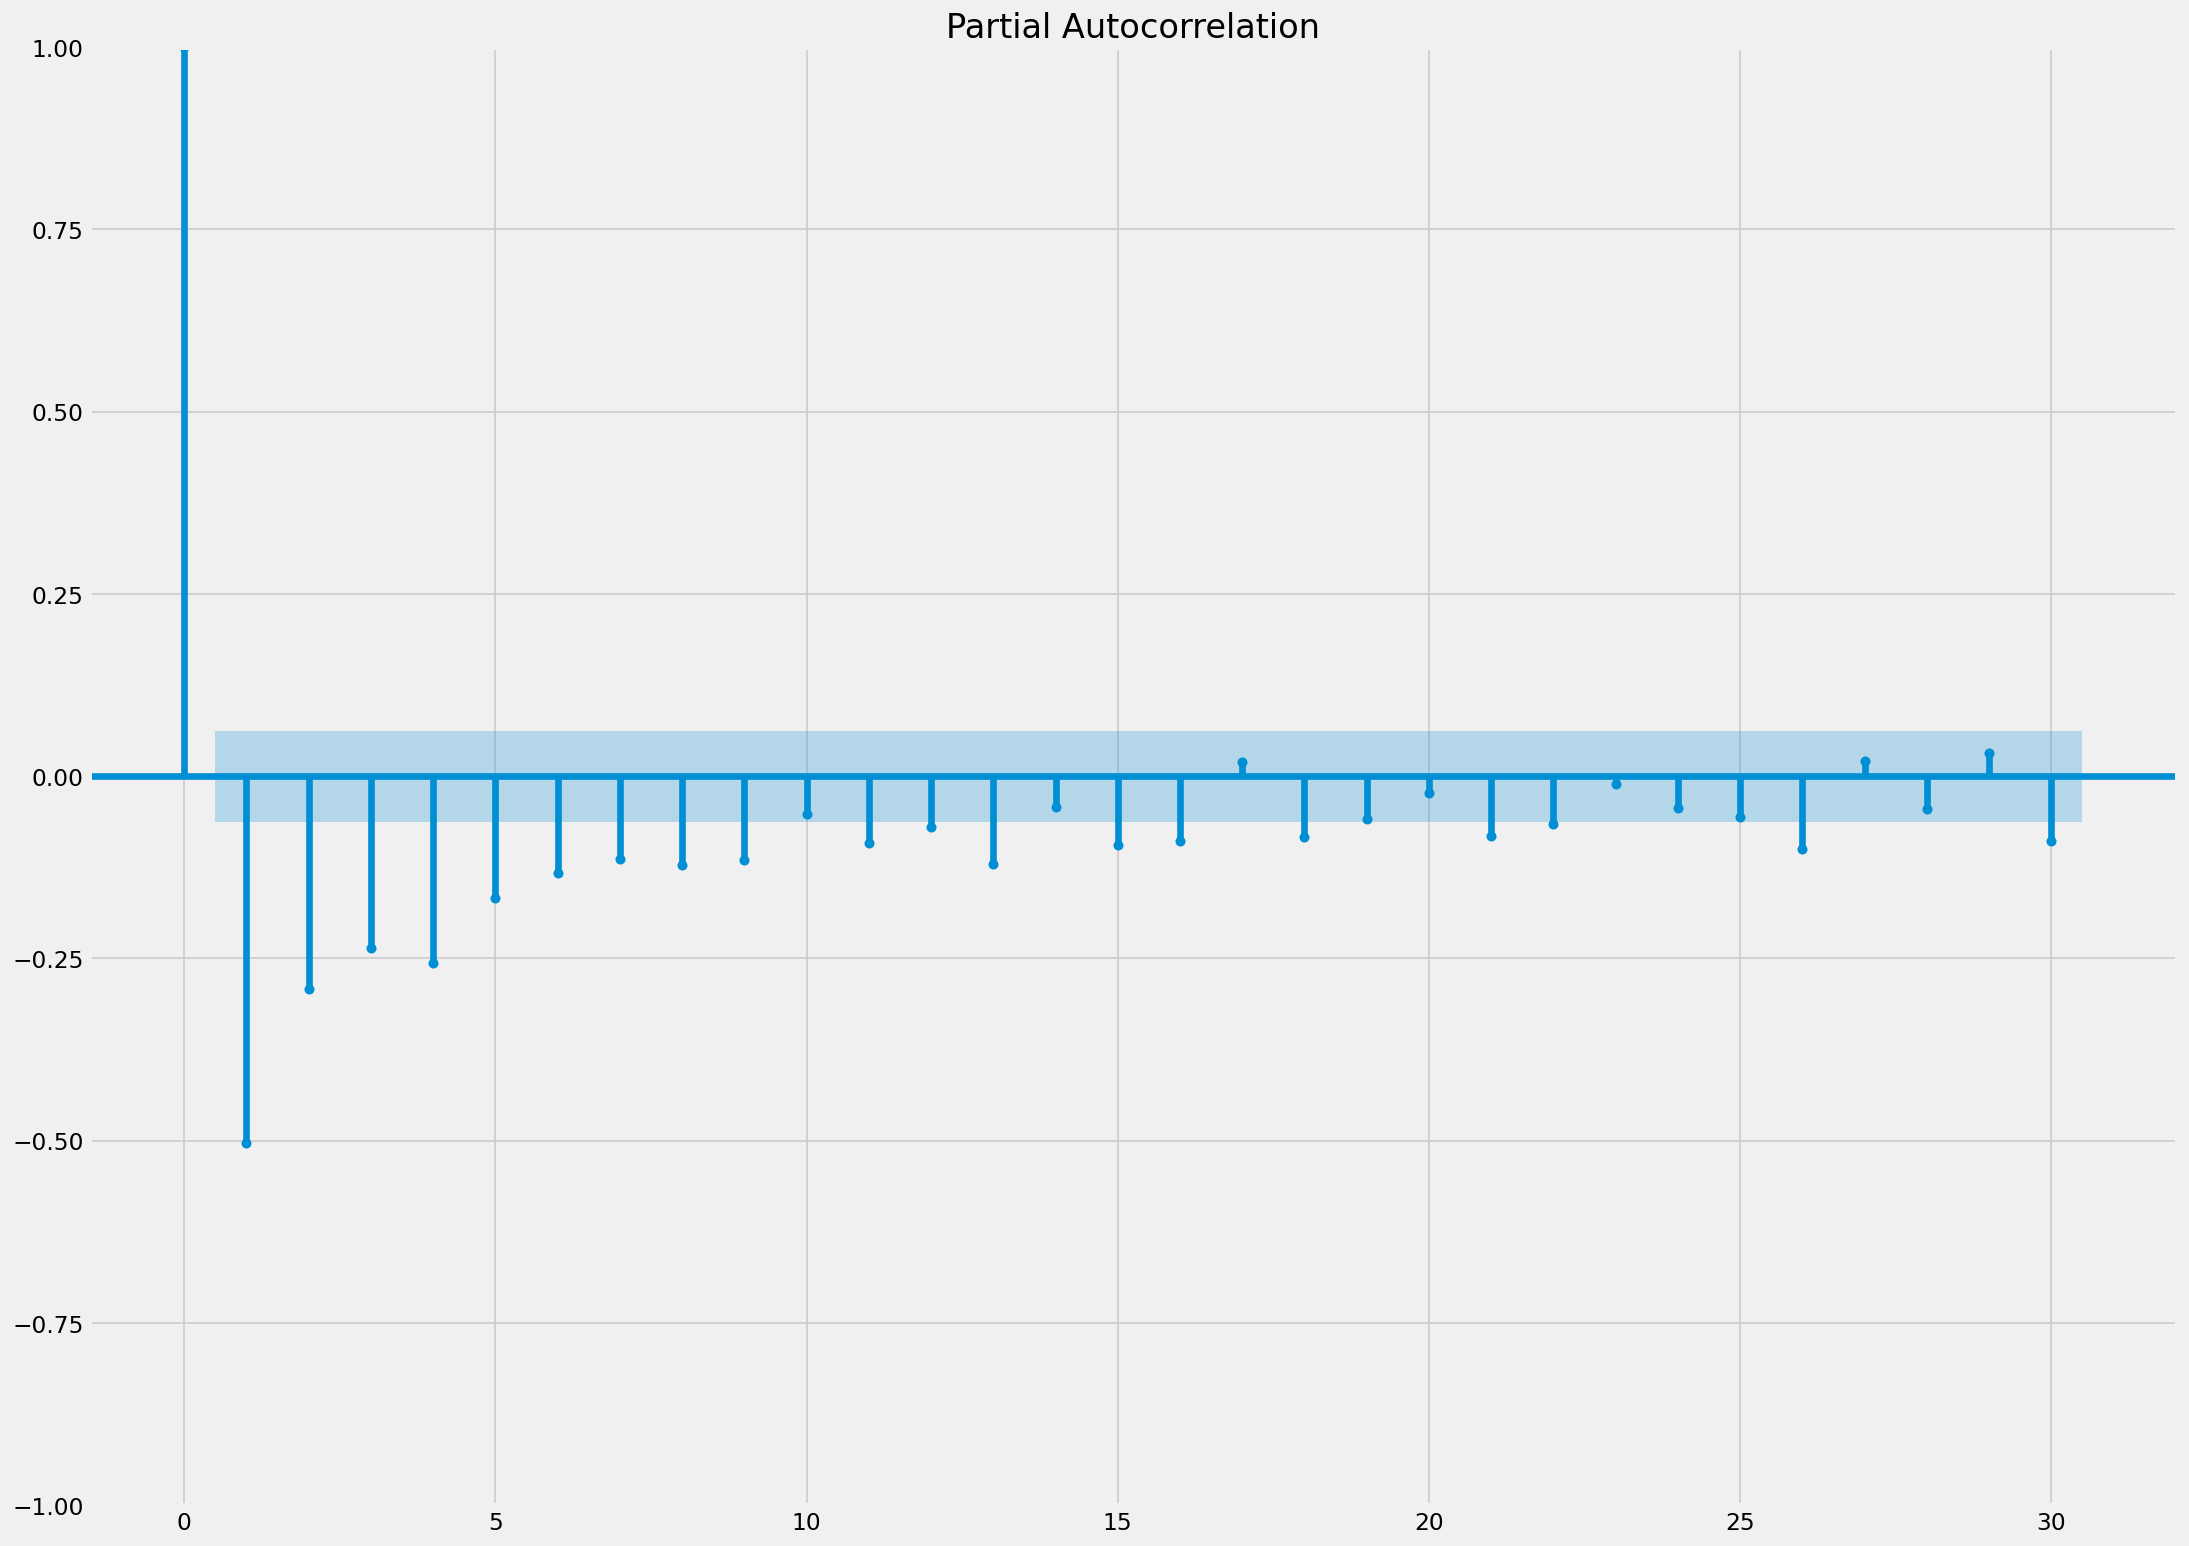

<Figure size 2400x1800 with 0 Axes>

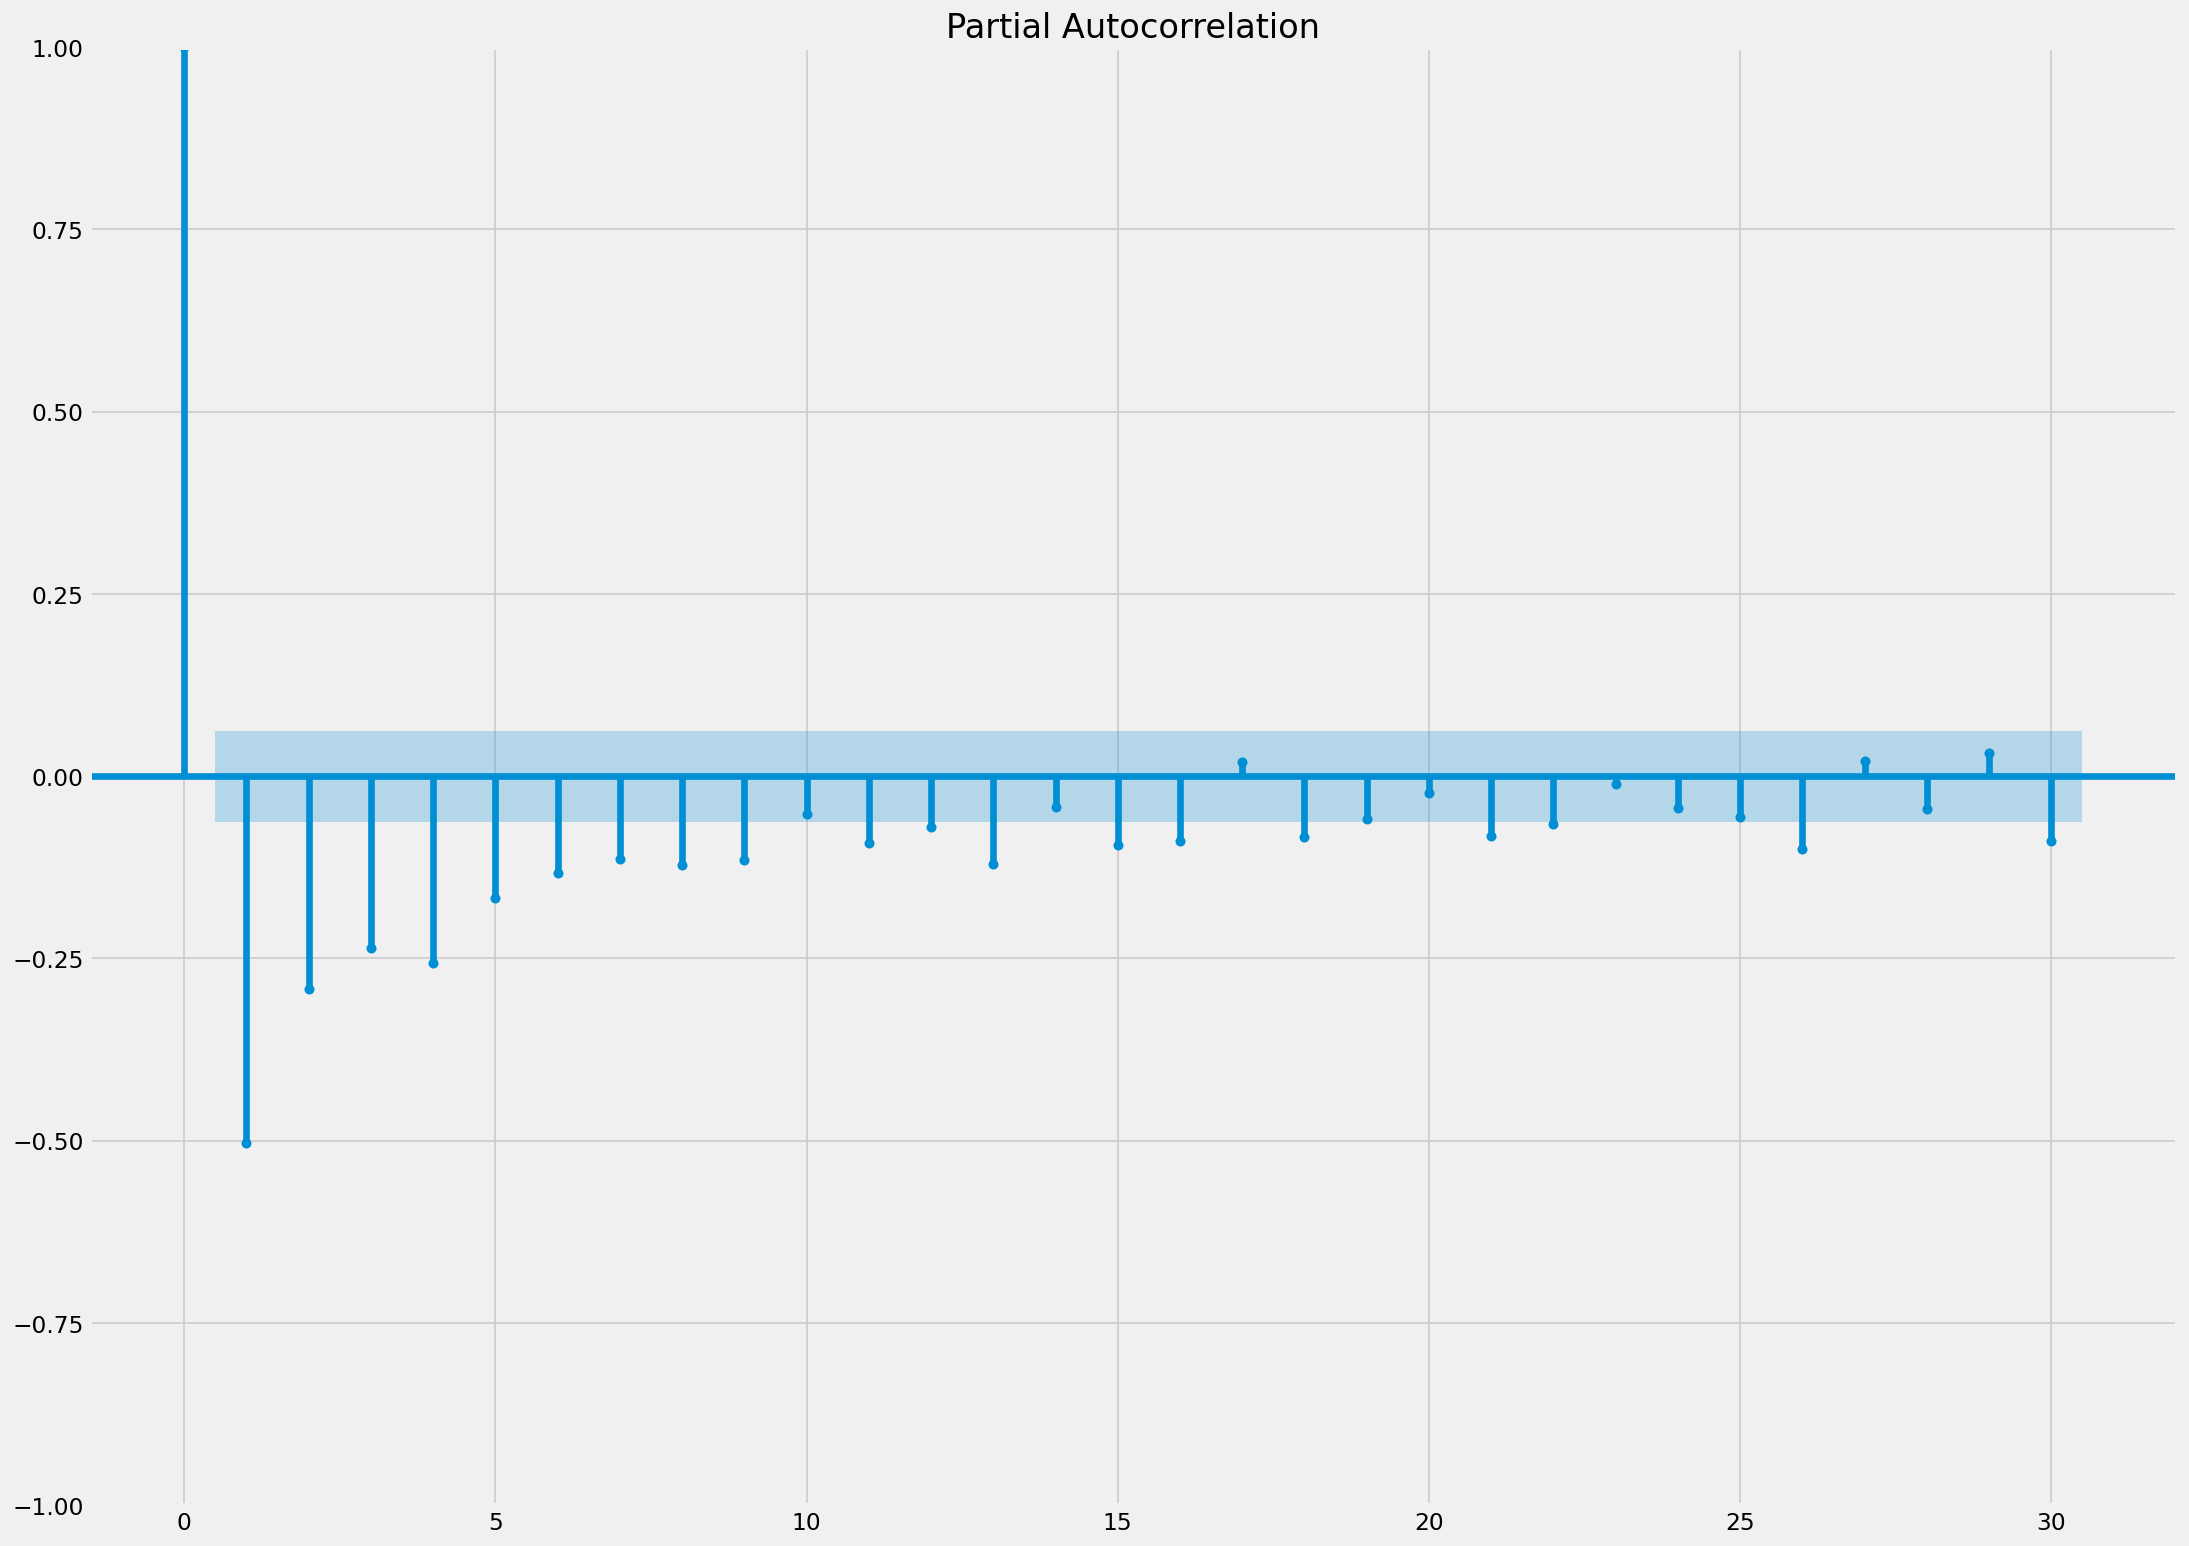

In [117]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (20,15))
plot_pacf(test_data.Close.diff().diff().dropna())

#### p = 1

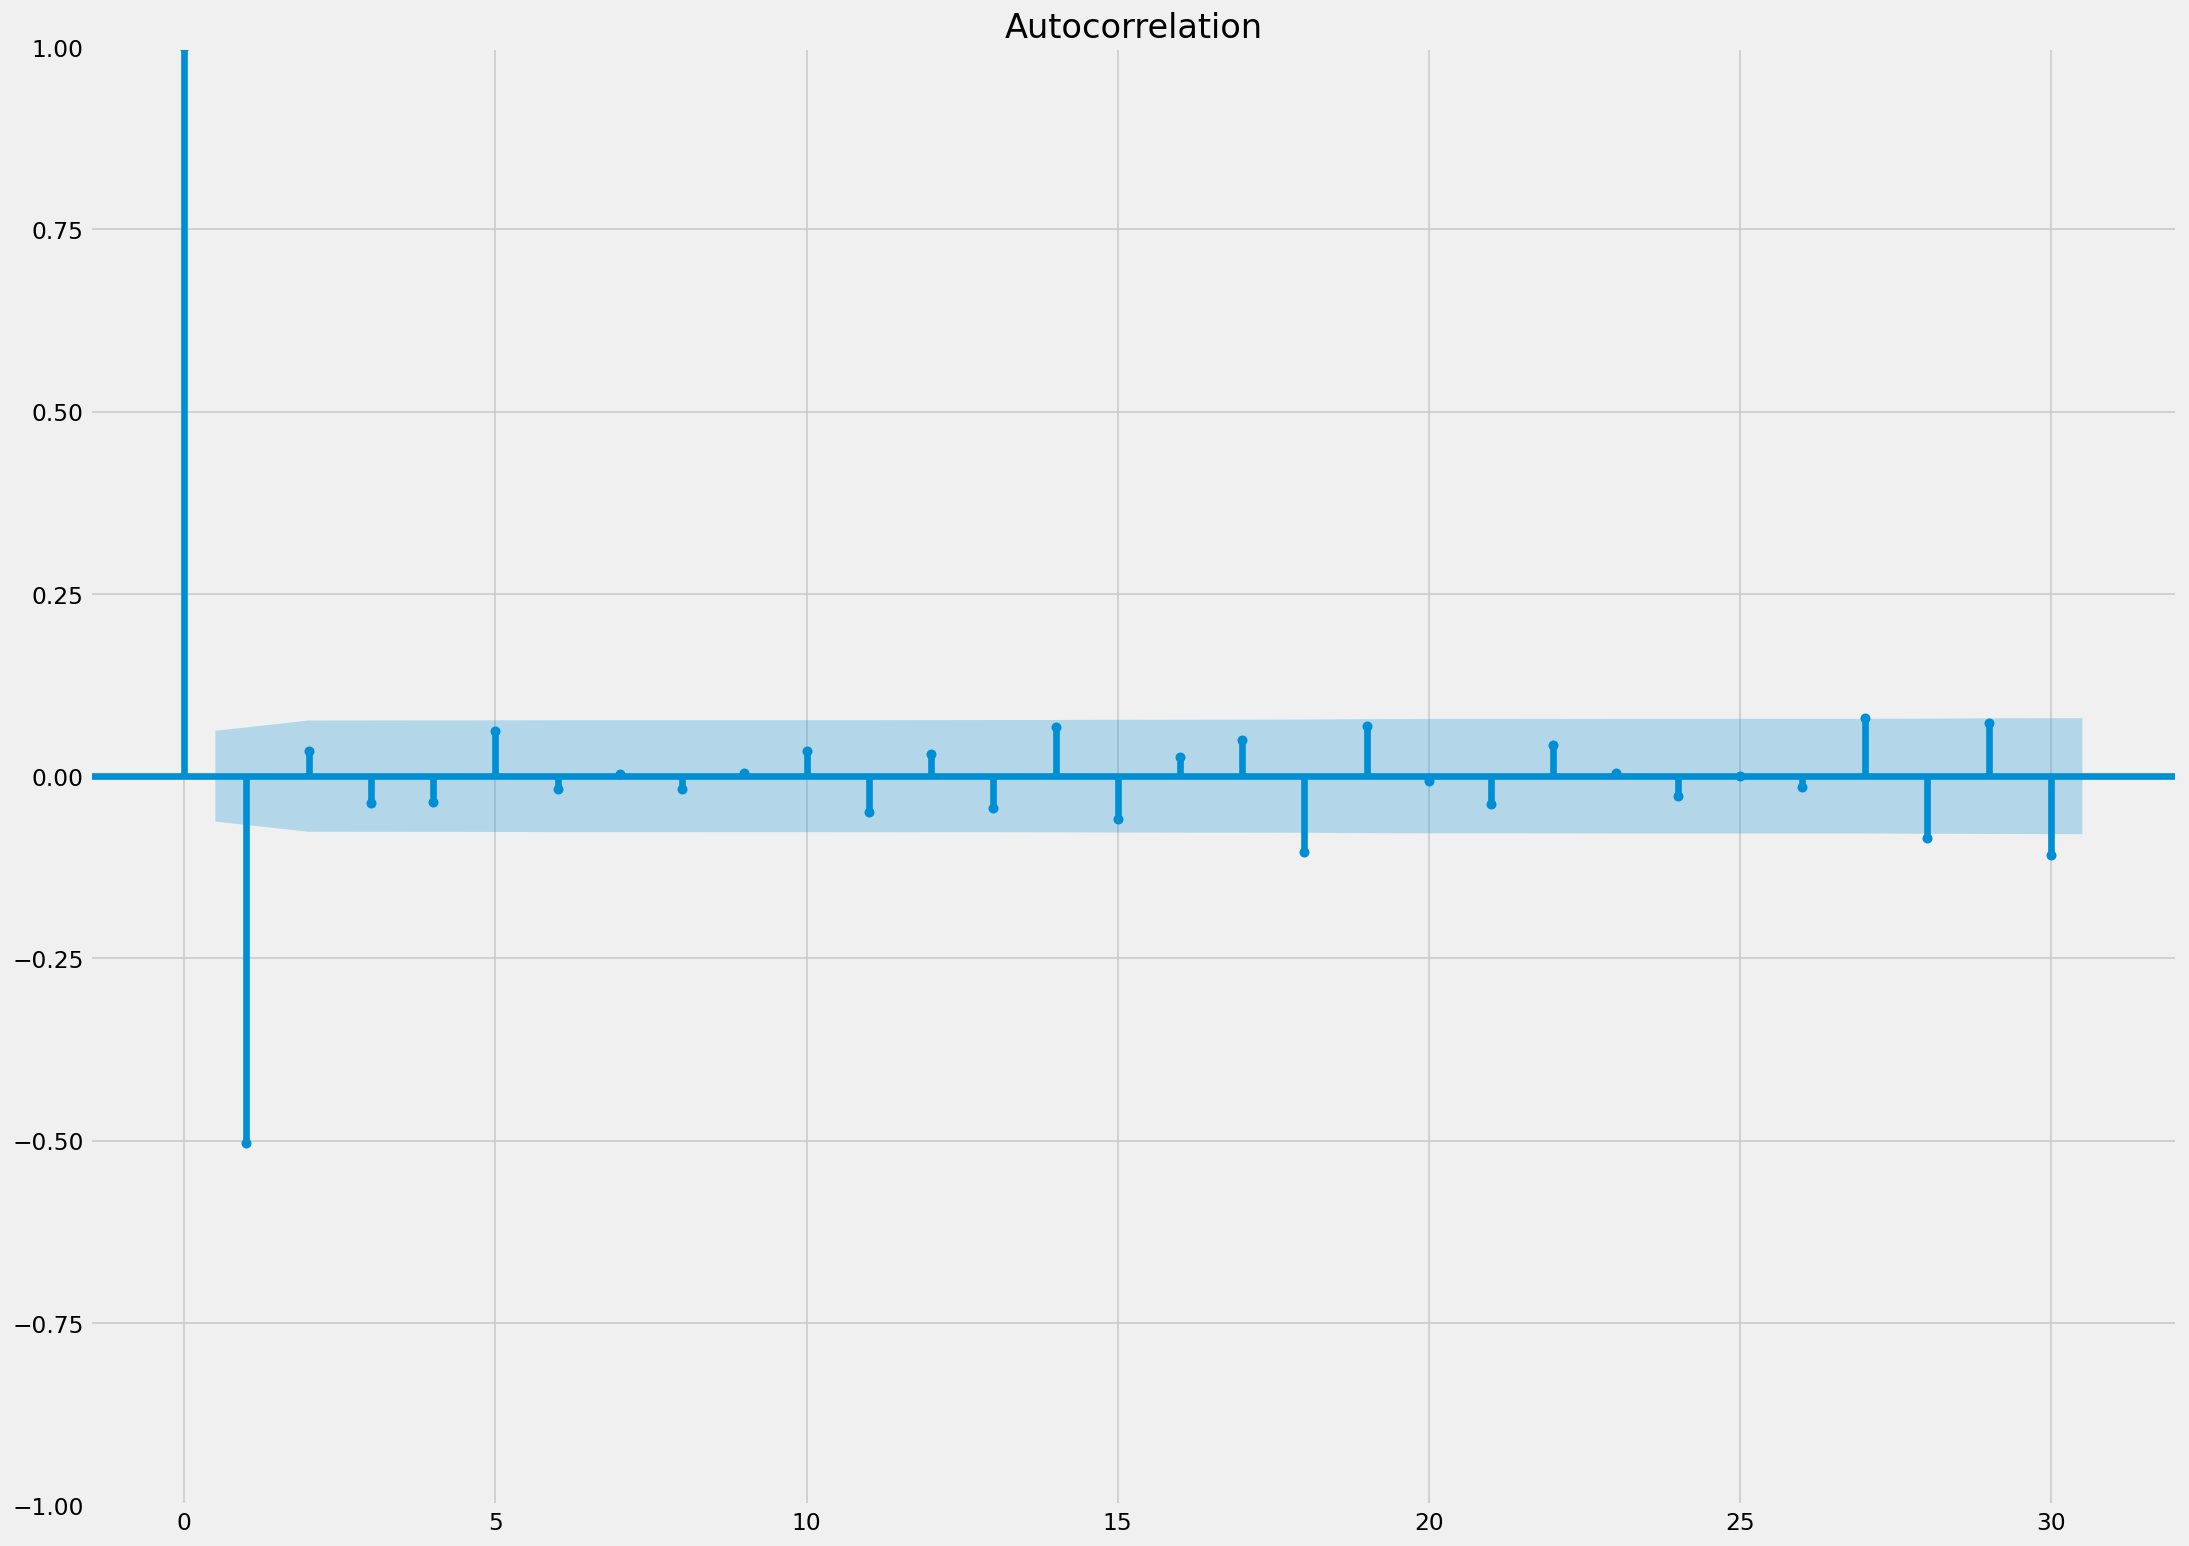

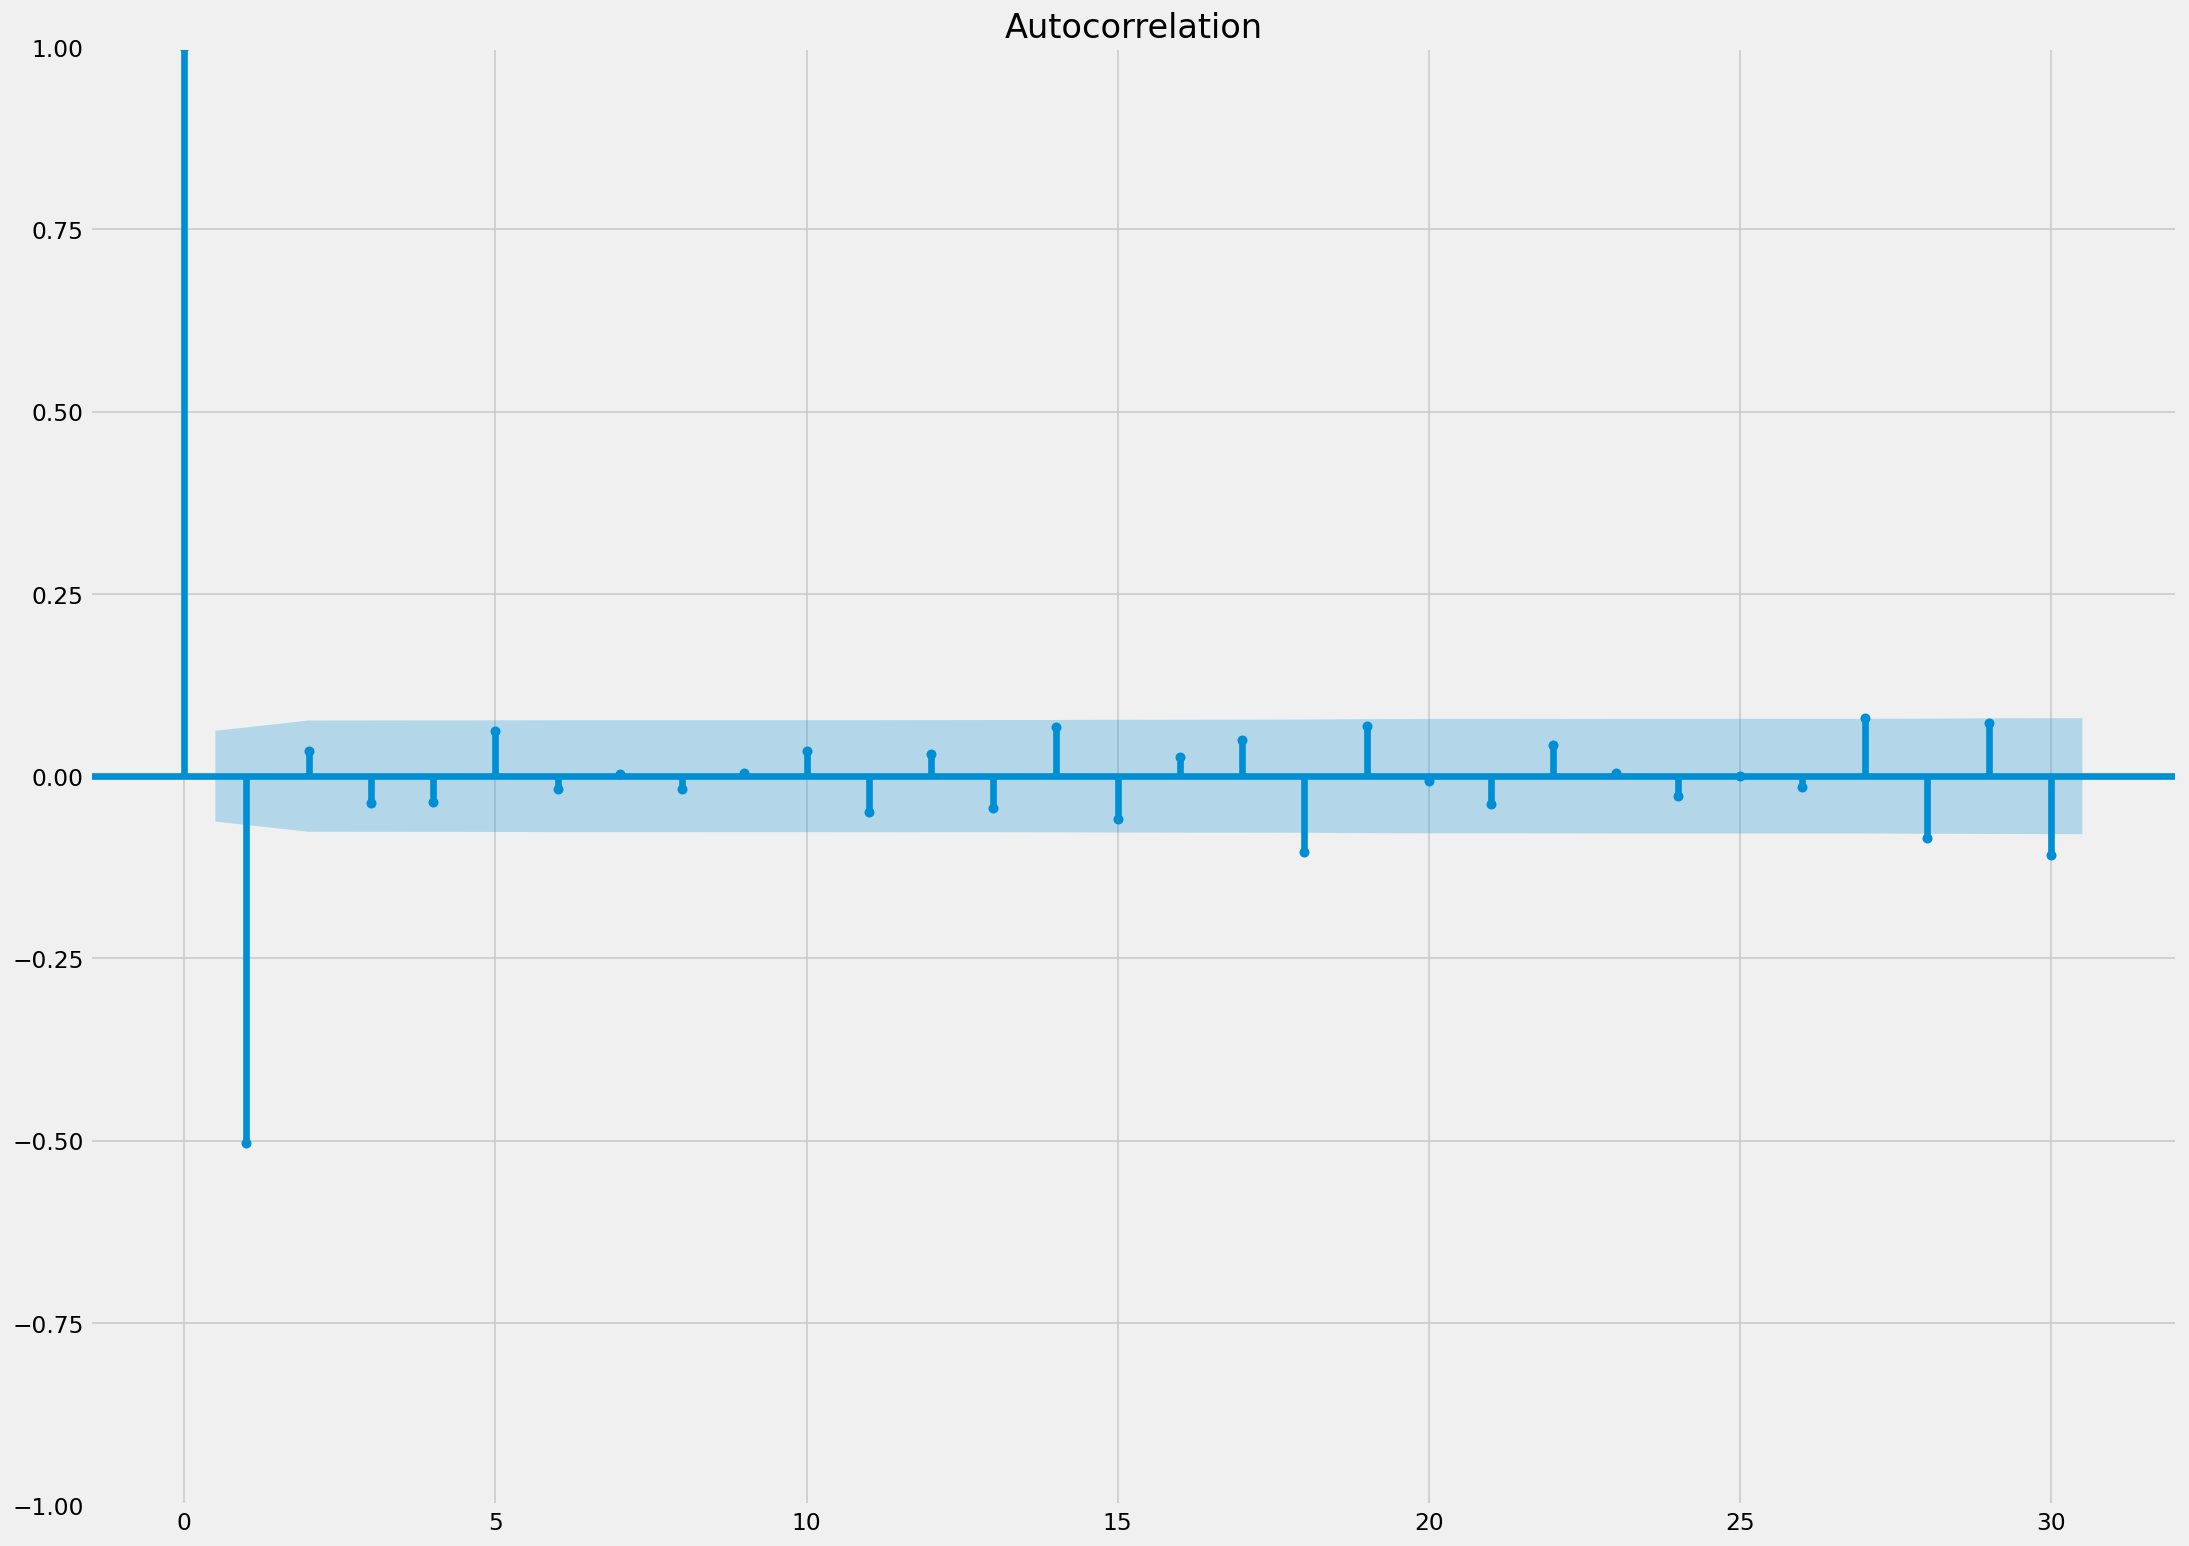

In [118]:
plot_acf(test_data.Close.diff().diff().dropna())

#### q= 1

In [121]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(train_data.Close, order = (1,2,1))
model_fit = model.fit()
model_fit.summary()

C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1490
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -6994.126
Date:                Wed, 02 Nov 2022   AIC                          13994.252
Time:                        14:33:11   BIC                          14010.168
Sample:                             0   HQIC                         14000.184
                               - 1490                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0105      0.049      0.212      0.832      -0.086       0.107
ma.L1         -1.0000      0.201     -4.972      0.000      -1.394      -0.606
sigma2       704.9363    142.330      4.953      0.000     425.975     983.898
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          24944199.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               8.58   Skew:                           -20.32
Prob(H) (two-sided):                  0.00   Kurtosis:                       635.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
train_R = train_data['Close'].values
test_R = test_data['Close'].values

history = [x for x in train_R]
print(type(history))
predictions = list()
for t in range(len(test_R)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_R[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))


<class 'list'>


In [125]:
error = mean_squared_error(test_R, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = rel_val(test_R, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error3 = sqrt(mean_squared_error(test_R, predictions))
print('RMSE:%.3f'% error3)

Testing Mean Squared Error: 1301.836
Symmetric mean absolute percentage error: 1.430
RMSE:36.081


C:\Users\Shriprada\AppData\Local\Temp\ipykernel_12004\2500584398.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(R['Close'], 'green', color='blue', label='Training Data')


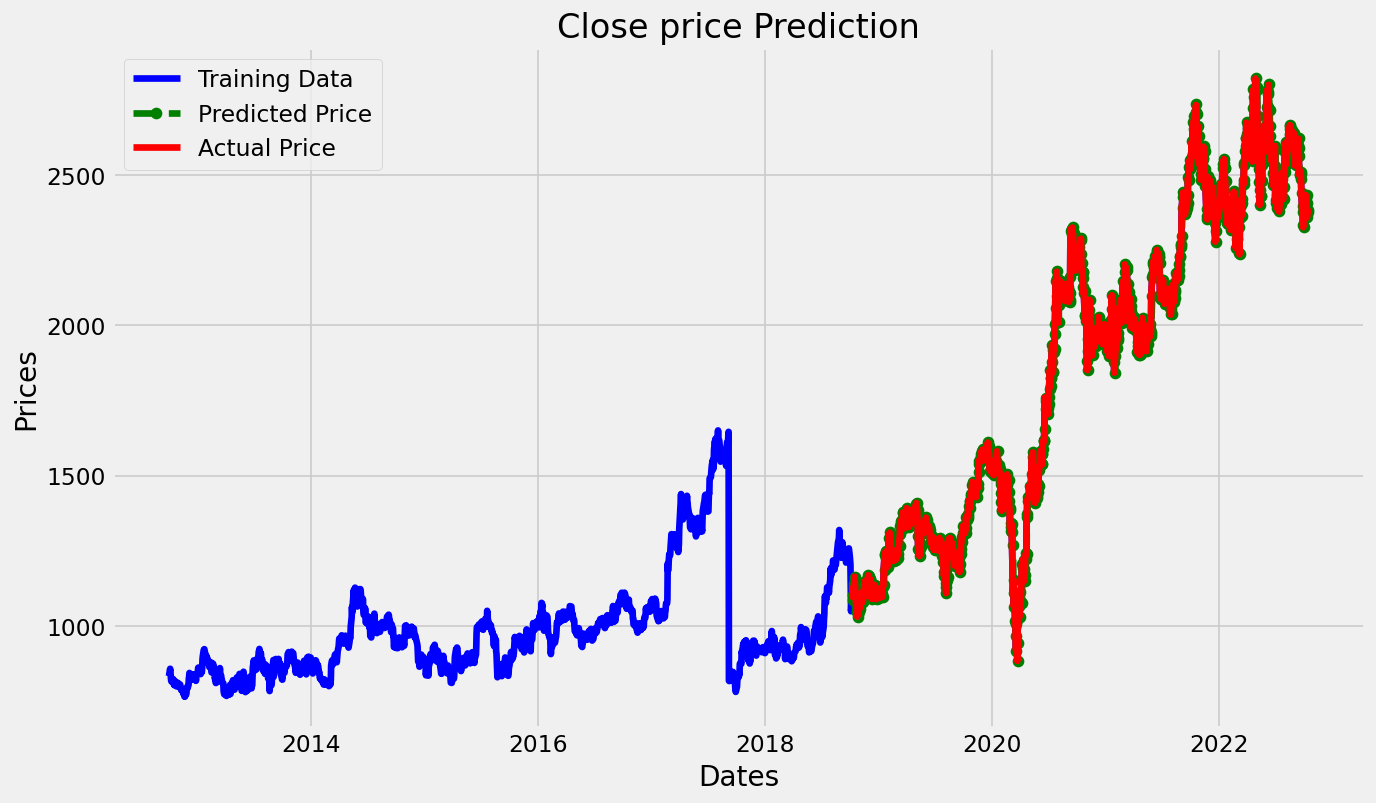

In [126]:
plt.figure(figsize=(12,7))
plt.plot(R['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Close price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [127]:
start_date_n = date(2022, 10, 1)
end_date_n = date(2022,10,15)

R_n = get_history(symbol = 'RELIANCE', start = start_date_n, end = end_date_n)
print(R_n)

              Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2022-10-03  RELIANCE     EQ     2377.75  2391.50  2416.95  2363.00  2367.05   
2022-10-04  RELIANCE     EQ     2369.50  2397.80  2418.00  2390.15  2412.90   
2022-10-06  RELIANCE     EQ     2413.20  2429.00  2450.00  2418.15  2422.50   
2022-10-07  RELIANCE     EQ     2422.10  2414.65  2443.90  2414.65  2431.95   
2022-10-10  RELIANCE     EQ     2432.35  2405.00  2417.60  2388.00  2407.00   
2022-10-11  RELIANCE     EQ     2405.80  2414.00  2414.00  2351.10  2353.55   
2022-10-12  RELIANCE     EQ     2357.90  2352.00  2381.70  2343.10  2377.00   
2022-10-13  RELIANCE     EQ     2375.25  2371.40  2394.00  2360.10  2381.00   
2022-10-14  RELIANCE     EQ     2382.80  2415.00  2416.35  2369.10  2371.75   

              Close     VWAP   Volume      Turnover  Trades  \
Date                                                          
2022

In [128]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
modelss = smapi.tsa.arima.ARIMA(R.Close, order = (1,2,1))
modelss_fit = modelss.fit()
modelss_fit.summary()

C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2484
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -12025.389
Date:                Wed, 02 Nov 2022   AIC                          24056.778
Time:                        14:43:57   BIC                          24074.228
Sample:                             0   HQIC                         24063.115
                               - 2484                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0121      0.020      0.618      0.537      -0.026       0.051
ma.L1         -1.0000      0.032    -31.136      0.000      -1.063      -0.937
sigma2       943.0193     30.468     30.951      0.000     883.304    1002.735
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           4812942.05
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.74   Skew:                            -7.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       218.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
train_r = R_n['Close'].values
test_r = R_n['Close'].values

history = [x for x in train_r]
print(type(history))
predictions = list()
for t in range(len(test_r)):
    modelss = ARIMA(history, order=(1,2,1))
    modelss_fit = modelss.fit()
    output = modelss_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_r[t]
    history.append(obs)

<class 'list'>


C:\Users\Shriprada\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [130]:
pred_new = pd.DataFrame(modelss_fit.predict(start=0,end=11)[1:], columns = ['Prediction'])
pred_new

,Prediction
0,3554.420446
1,2457.889344
2,2444.711500
3,2451.920143
4,2406.349699
5,2344.596965
6,2382.730570
7,2387.859237
8,2368.904888
9,2370.469681


In [131]:
r_n = pd.DataFrame(model_fit.predict(start= 2473, end = 2484)[1:], columns = ['Close'])
r_n

,Close
0,2325.809590
1,2379.012310
2,2370.013395
3,2414.368633
4,2422.844644
5,2433.115085
6,2406.102280
7,2357.920616
8,2376.078548
9,2383.510995


In [132]:
r_nc = pd.DataFrame(r_n['Close'])
r_nc.reset_index(inplace=True)
r_nc

,index,Close
0,0,2325.809590
1,1,2379.012310
2,2,2370.013395
3,3,2414.368633
4,4,2422.844644
5,5,2433.115085
6,6,2406.102280
7,7,2357.920616
8,8,2376.078548
9,9,2383.510995


In [133]:
p_n = pd.concat([pred_new, r_nc], axis = 1)
p_n.drop(columns = ['index'])

,Prediction,Close
0,3554.420446,2325.809590
1,2457.889344,2379.012310
2,2444.711500,2370.013395
3,2451.920143,2414.368633
4,2406.349699,2422.844644
5,2344.596965,2433.115085
6,2382.730570,2406.102280
7,2387.859237,2357.920616
8,2368.904888,2376.078548
9,2370.469681,2383.510995


<AxesSubplot:>

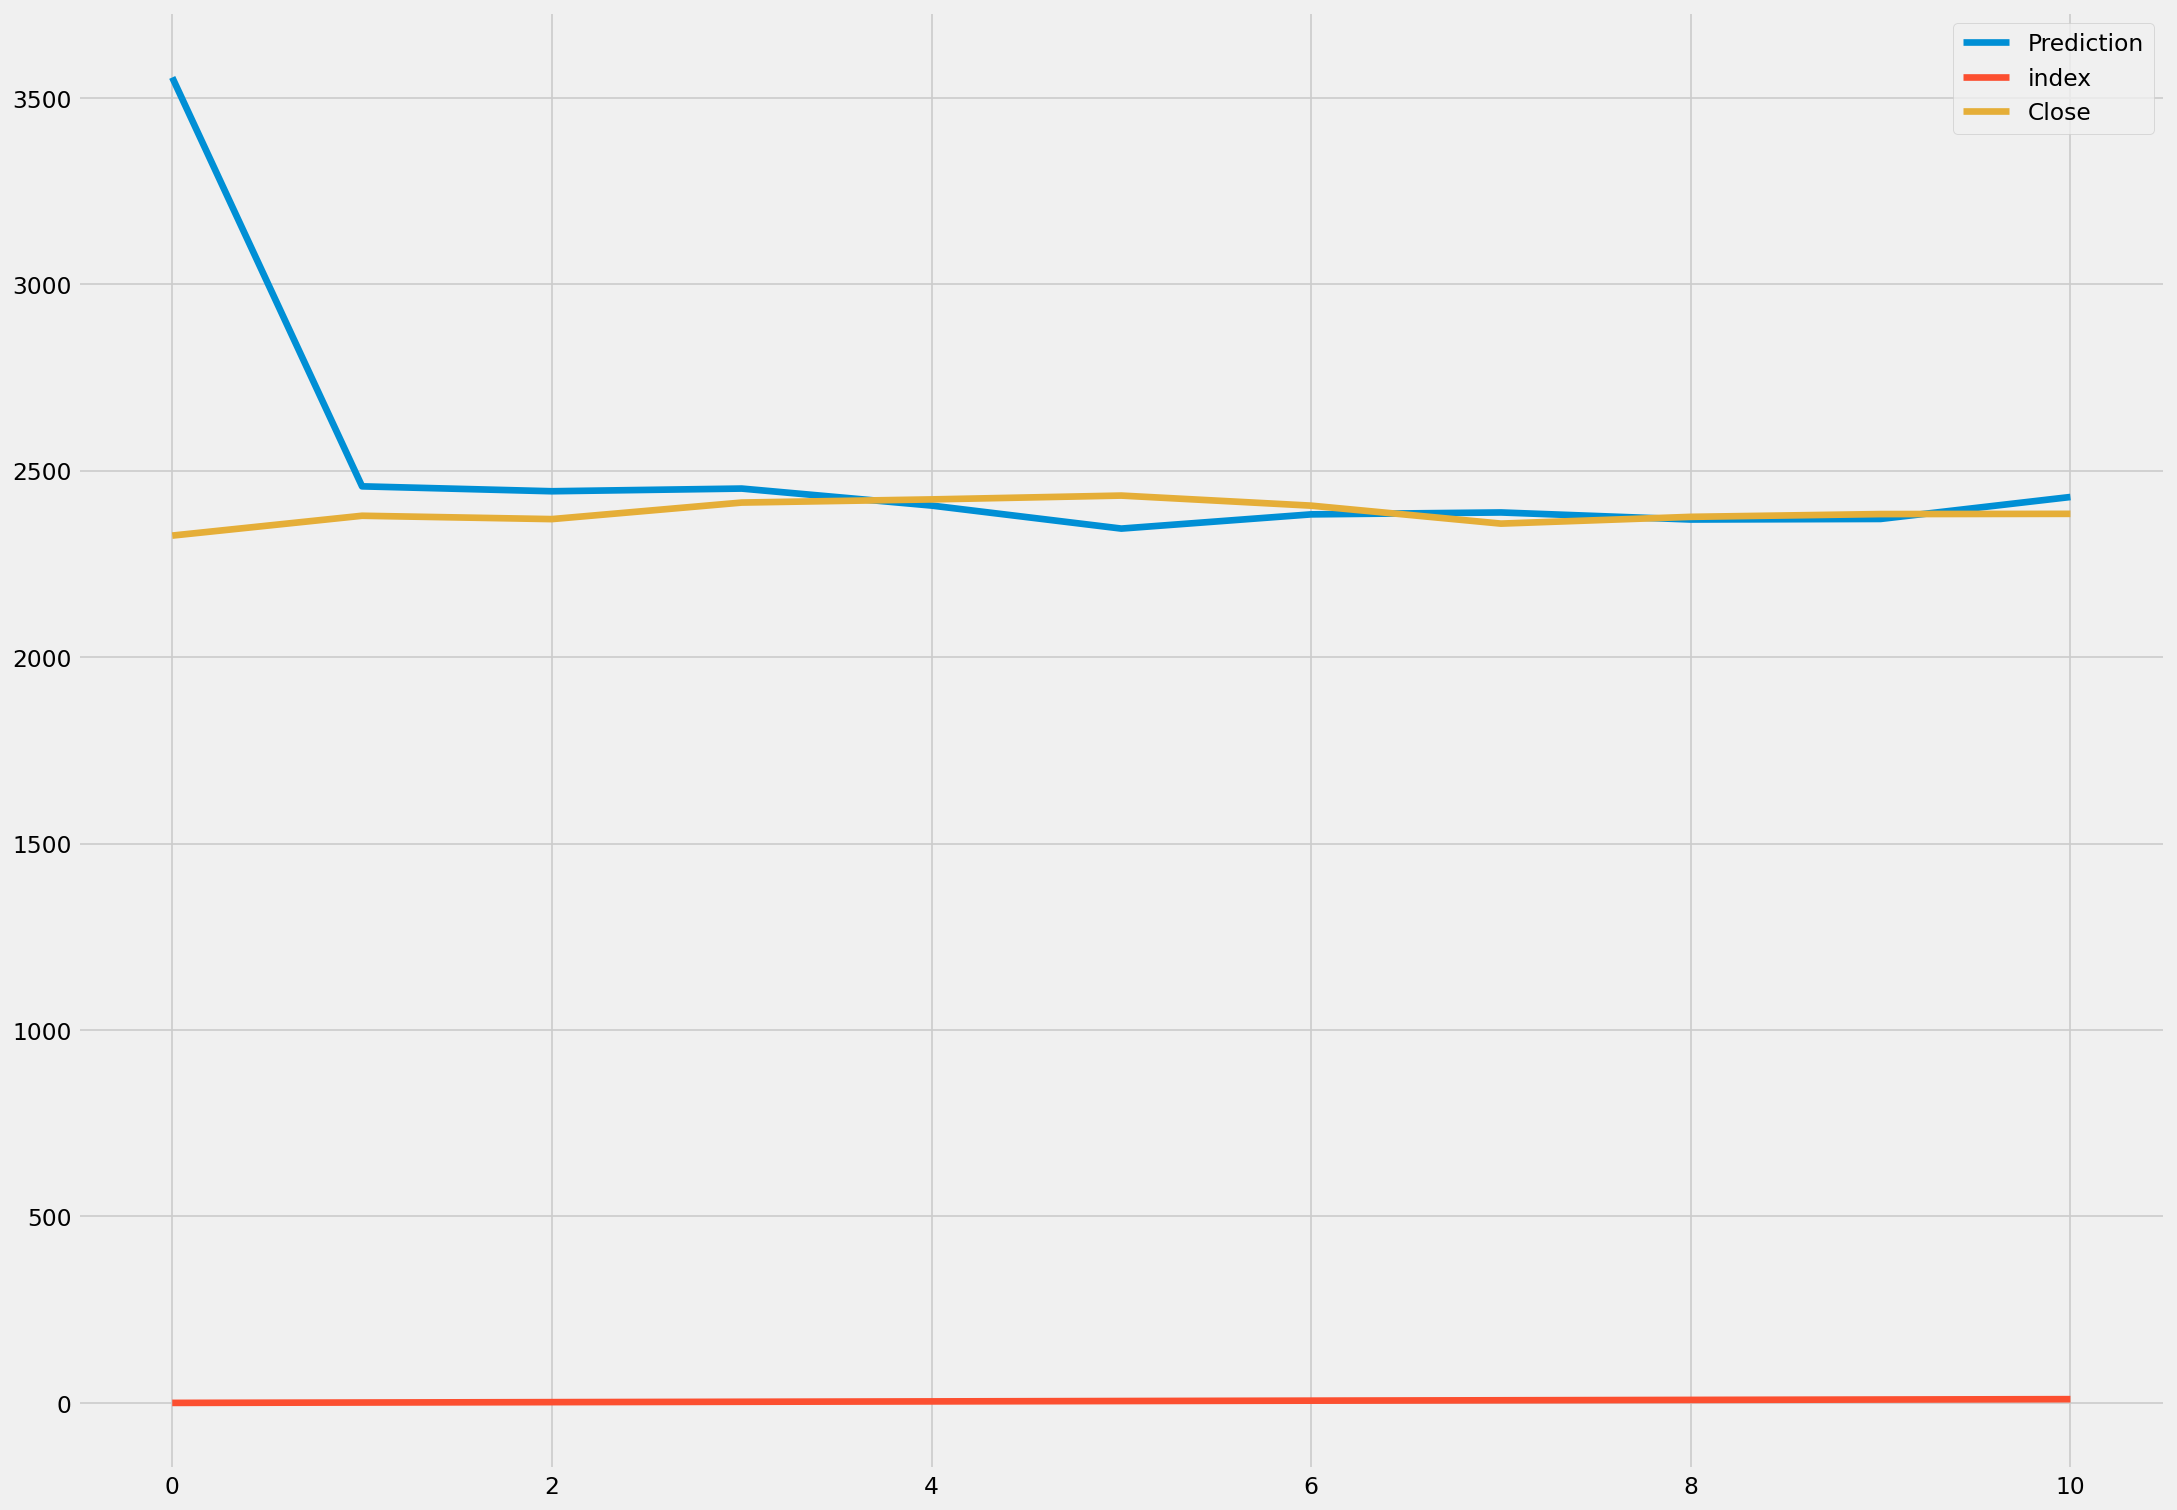

In [134]:
p_n.plot()

In [137]:
from statsmodels.tools.eval_measures import rmse
rmse_wipro_arima = rmse(p_n['Close'], p_n['Prediction'])
rmse_wipro_arima

373.4980286683062

## LSTM

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
R_Close

,Close
Date,
2012-10-01,833.50
2012-10-03,846.10
2012-10-04,852.90
2012-10-05,857.80
2012-10-08,819.40
...,...
2022-10-10,2405.80
2022-10-11,2357.90
2022-10-12,2375.25


In [68]:
train_r = R_Close.iloc[:2300]
test_r = R_Close.iloc[2300:]

In [69]:
test_r = test_r[0:184]

In [70]:
test_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 2022-01-18 to 2022-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   184 non-null    float64
dtypes: float64(1)
memory usage: 2.9+ KB


In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
scaler.fit(train_r)

MinMaxScaler()

In [74]:
scaler_train = scaler.transform(train_r)
scaler_test = scaler.transform(test_r)

In [75]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [76]:
len(scaler_train)

2300

In [77]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [78]:
n_input = 184
n_feature = 1

train_generator_r = TimeseriesGenerator(scaler_train, scaler_train, length = n_input, batch_size = 1)

In [79]:
models = Sequential()

models.add(LSTM(128, activation = 'relu', input_shape=(n_input, n_feature), return_sequences = True))
models.add(LSTM(128, activation = 'relu', input_shape=(n_input, n_feature), return_sequences = True))
models.add(LSTM(128, activation = 'relu', input_shape=(n_input, n_feature), return_sequences = False))
models.add(Dense(1))


In [80]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 184, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 184, 128)          131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


In [81]:
models.compile(optimizer = 'adam', loss= 'mean_squared_error')
models.fit_generator(train_generator_r, epochs = 4)

C:\Users\Shriprada\AppData\Local\Temp\ipykernel_12004\4281100873.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  models.fit_generator(train_generator_r, epochs = 4)


Epoch 1/4
2116/2116 [==============================] - 635s 290ms/step - loss: 0.0050
Epoch 2/4
2116/2116 [==============================] - 579s 274ms/step - loss: 0.0016
Epoch 3/4
2116/2116 [==============================] - 572s 270ms/step - loss: 0.0013
Epoch 4/4
2116/2116 [==============================] - 557s 263ms/step - loss: 9.3197e-04


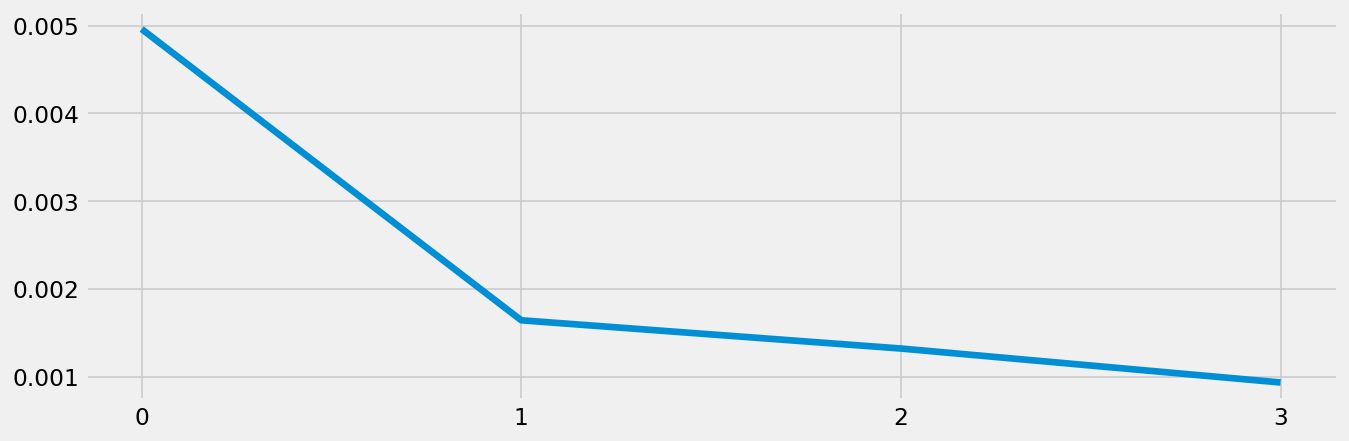

In [82]:
losses_lstm = models.history.history['loss']
plt.figure(figsize = (12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [83]:
lstm_predictions_scaled = list()

batch = scaler_train[-n_input:]
current_batch = batch.reshape((1, n_input, n_feature))

for i in range(len(test_r)):   
    lstm_pred = models.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 52ms/step


In [84]:
lstm_predictions_scaled

[array([0.90264463], dtype=float32),
 array([0.8991693], dtype=float32),
 array([0.894239], dtype=float32),
 array([0.8887446], dtype=float32),
 array([0.88313574], dtype=float32),
 array([0.8777387], dtype=float32),
 array([0.87275535], dtype=float32),
 array([0.8682896], dtype=float32),
 array([0.8643727], dtype=float32),
 array([0.86098903], dtype=float32),
 array([0.85809445], dtype=float32),
 array([0.8556303], dtype=float32),
 array([0.8535349], dtype=float32),
 array([0.85174876], dtype=float32),
 array([0.8502193], dtype=float32),
 array([0.84890145], dtype=float32),
 array([0.84775805], dtype=float32),
 array([0.84676], dtype=float32),
 array([0.8458833], dtype=float32),
 array([0.84511054], dtype=float32),
 array([0.84442735], dtype=float32),
 array([0.8438226], dtype=float32),
 array([0.8432872], dtype=float32),
 array([0.8428141], dtype=float32),
 array([0.84239656], dtype=float32),
 array([0.8420291], dtype=float32),
 array([0.84170634], dtype=float32),
 array([0.84142387]

In [85]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[2540.40067325],
       [2533.56647924],
       [2523.87101007],
       [2513.06624148],
       [2502.03642482],
       [2491.42318151],
       [2481.62339318],
       [2472.8414785 ],
       [2465.13885683],
       [2458.48493571],
       [2452.79274342],
       [2447.94694284],
       [2443.82633621],
       [2440.31394542],
       [2437.3062718 ],
       [2434.71470267],
       [2432.46621463],
       [2430.50349075],
       [2428.7795288 ],
       [2427.2598683 ],
       [2425.91637824],
       [2424.72713987],
       [2423.67433689],
       [2422.74390379],
       [2421.92282999],
       [2421.20021472],
       [2420.56550885],
       [2420.01003865],
       [2419.52524761],
       [2419.10351691],
       [2418.73746217],
       [2418.42028505],
       [2418.14565609],
       [2417.90888677],
       [2417.70458532],
       [2417.52900094],
       [2417.37779678],
       [2417.24757365],
       [2417.13575289],
       [2417.03999025],
       [2416.95758984],
       [2416.886

In [86]:
test_r['LSTM_Predictions'] = lstm_predictions
test_r

,Close,LSTM_Predictions
Date,,
2022-01-18,2521.80,2540.400673
2022-01-19,2521.60,2533.566479
2022-01-20,2477.45,2523.871010
2022-01-21,2477.85,2513.066241
2022-01-24,2377.90,2502.036425
...,...,...
2022-10-10,2405.80,2416.481473
2022-10-11,2357.90,2416.481473
2022-10-12,2375.25,2416.481473


<AxesSubplot:xlabel='Date'>

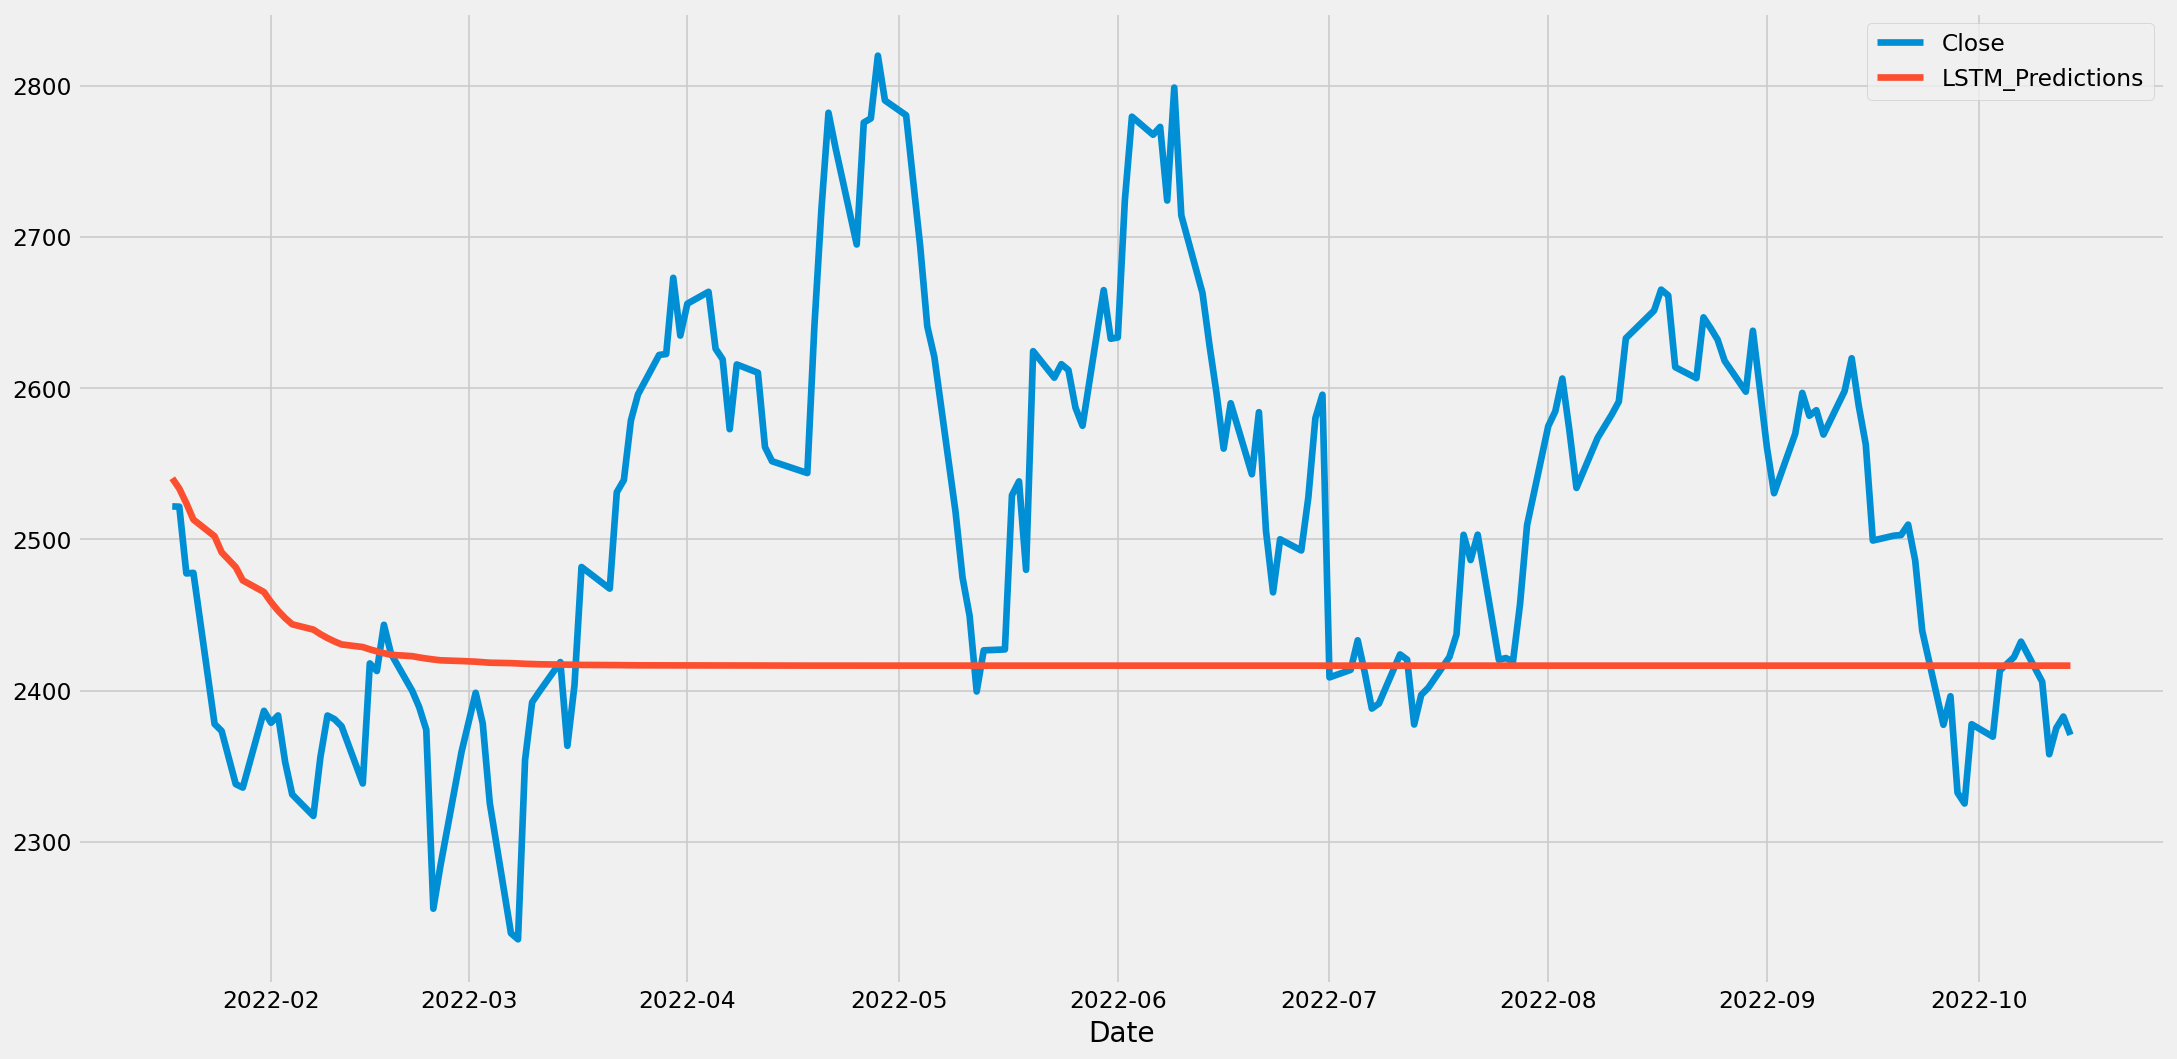

In [87]:
test_r['Close'].plot(figsize=(20,10), legend = True)
test_r['LSTM_Predictions'].plot(legend = True)

In [88]:
from statsmodels.tools.eval_measures import rmse
lstm_rmse_error = rmse(test_r['Close'], test_r["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = R_Close['Close'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 27134.245302754156
RMSE Error: 164.72475619272944
Mean: 1338.0735909822868


## Prophet

In [89]:
R.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2012-10-01 to 2022-10-14
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prev Close  2484 non-null   float64
 1   Open        2484 non-null   float64
 2   High        2484 non-null   float64
 3   Low         2484 non-null   float64
 4   Last        2484 non-null   float64
 5   Close       2484 non-null   float64
dtypes: float64(6)
memory usage: 135.8 KB


In [90]:
r_pr = R_Close.copy()

In [91]:
r_pr = R_Close.reset_index()

In [92]:
r_pr.columns = ['ds', 'y']

In [93]:
train_r_pr = r_pr.iloc[:len(R_Close)-30]
test_r_pr = r_pr.iloc[len(R_Close)-30:]

In [94]:
test_r_pr

,ds,y
2454,2022-09-02,2530.50
2455,2022-09-05,2569.80
2456,2022-09-06,2596.85
2457,2022-09-07,2581.75
2458,2022-09-08,2585.40
2459,2022-09-09,2569.30
2460,2022-09-12,2598.05
2461,2022-09-13,2619.75
2462,2022-09-14,2588.35
2463,2022-09-15,2562.70


In [95]:
!pip install prophet
from prophet import Prophet

In [96]:
df_r = Prophet()
df_r.fit(train_r_pr) 
future = df_r.make_future_dataframe(periods = 30, freq='MS')
prophet_pred_r = df_r.predict(future)

14:28:04 - cmdstanpy - INFO - Chain [1] start processing
14:28:06 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
prophet_pred_r

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-10-01,804.491926,671.253933,977.090862,804.491926,804.491926,21.155345,21.155345,21.155345,0.486236,0.486236,0.486236,20.669109,20.669109,20.669109,0.0,0.0,0.0,825.647271
1,2012-10-03,804.875857,681.689334,985.497779,804.875857,804.875857,27.883428,27.883428,27.883428,3.216261,3.216261,3.216261,24.667167,24.667167,24.667167,0.0,0.0,0.0,832.759284
2,2012-10-04,805.067822,687.199128,987.606192,805.067822,805.067822,28.075359,28.075359,28.075359,1.414770,1.414770,1.414770,26.660589,26.660589,26.660589,0.0,0.0,0.0,833.143181
3,2012-10-05,805.259787,686.872628,978.178656,805.259787,805.259787,28.791779,28.791779,28.791779,0.193602,0.193602,0.193602,28.598178,28.598178,28.598178,0.0,0.0,0.0,834.051567
4,2012-10-08,805.835684,682.686292,991.803510,805.835684,805.835684,34.208946,34.208946,34.208946,0.486236,0.486236,0.486236,33.722710,33.722710,33.722710,0.0,0.0,0.0,840.044630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2024-11-01,3434.687532,2590.107533,4292.675417,2571.649489,4265.955036,9.041132,9.041132,9.041132,0.193602,0.193602,0.193602,8.847530,8.847530,8.847530,0.0,0.0,0.0,3443.728664
2480,2024-12-01,3464.583458,2536.633564,4361.070546,2555.639990,4340.492215,-3.758303,-3.758303,-3.758303,1.780865,1.780865,1.780865,-5.539168,-5.539168,-5.539168,0.0,0.0,0.0,3460.825155
2481,2025-01-01,3495.475915,2524.159911,4406.573974,2560.688789,4425.507443,-17.938399,-17.938399,-17.938399,3.216261,3.216261,3.216261,-21.154661,-21.154661,-21.154661,0.0,0.0,0.0,3477.537516
2482,2025-02-01,3526.368373,2495.428169,4461.097515,2557.496602,4515.598820,-39.867525,-39.867525,-39.867525,-7.637757,-7.637757,-7.637757,-32.229768,-32.229768,-32.229768,0.0,0.0,0.0,3486.500848


In [98]:
prophet_pred_r = pd.DataFrame({'Date': prophet_pred_r[-30:]['ds'], 'Pred': prophet_pred_r[-30:]['yhat']})

In [99]:
prophet_pred_r = prophet_pred_r.set_index('Date')

In [100]:
prophet_pred_r.index.freq = 'MS'

In [101]:
prophet_pred_r

,Pred
Date,
2022-10-01,2687.389970
2022-11-01,2716.767757
2022-12-01,2731.832706
2023-01-01,2747.050885
2023-02-01,2770.012737
2023-03-01,2797.677092
2023-04-01,2811.426103
2023-05-01,2878.273196
2023-06-01,2915.871544


In [102]:
test_r_pr['Prophet_prediction'] = prophet_pred_r['Pred'].values
test_r_pr

C:\Users\Shriprada\AppData\Local\Temp\ipykernel_12004\3826149448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_r_pr['Prophet_prediction'] = prophet_pred_r['Pred'].values


,ds,y,Prophet_prediction
2454,2022-09-02,2530.50,2687.389970
2455,2022-09-05,2569.80,2716.767757
2456,2022-09-06,2596.85,2731.832706
2457,2022-09-07,2581.75,2747.050885
2458,2022-09-08,2585.40,2770.012737
2459,2022-09-09,2569.30,2797.677092
2460,2022-09-12,2598.05,2811.426103
2461,2022-09-13,2619.75,2878.273196
2462,2022-09-14,2588.35,2915.871544
2463,2022-09-15,2562.70,2931.857931


In [103]:
import seaborn as sns

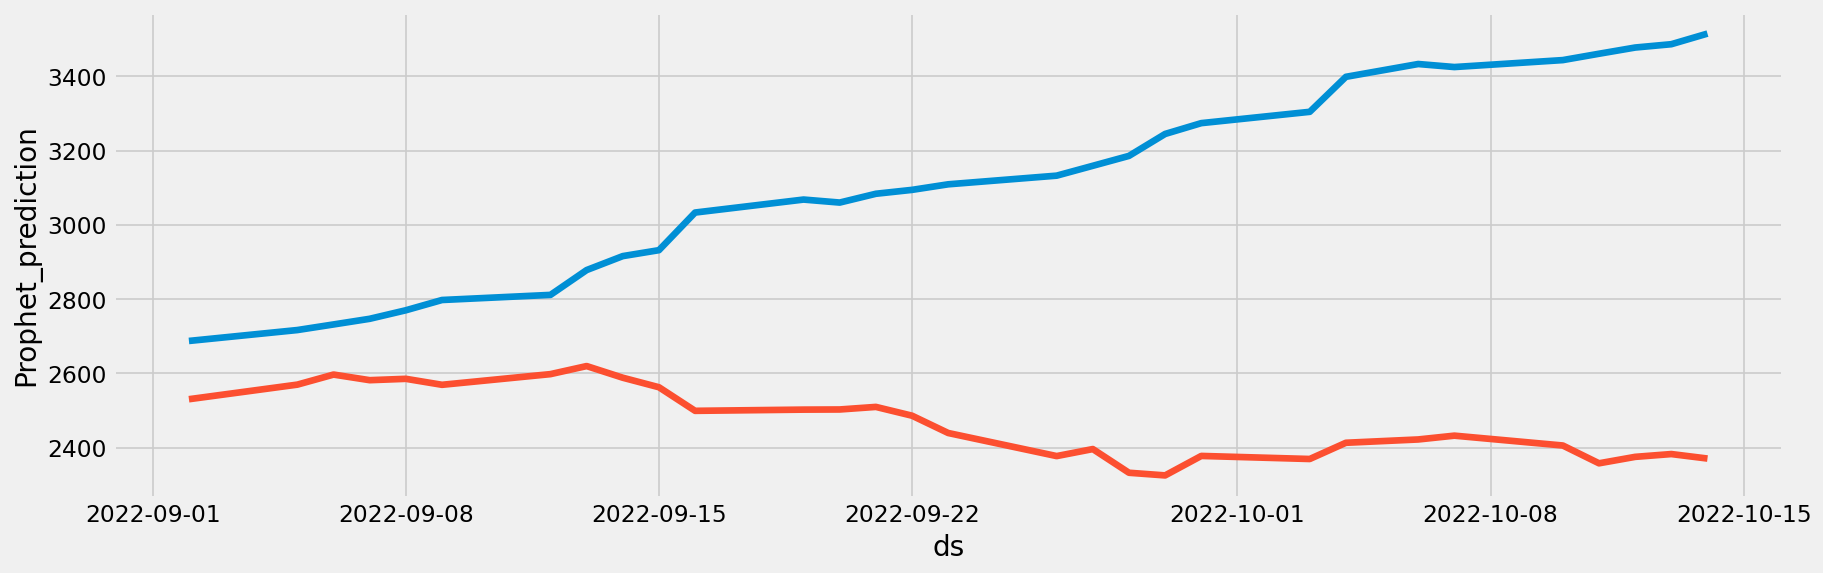

In [104]:
plt.figure(figsize =(16,5))
ax = sns.lineplot(x = test_r_pr['ds'], y = test_r_pr['Prophet_prediction'])
sns.lineplot(x = test_r_pr['ds'], y = test_r_pr['y']);

In [135]:
from statsmodels.tools.eval_measures import rmse
prophet_rmse_errors = rmse(test_r_pr['y'], test_r_pr["Prophet_prediction"])
prophet_mse_errors = prophet_rmse_errors**2
mean_values = R_Close['Close'].mean()

print(f'MSE Error: {prophet_mse_errors}\nRMSE Error: {prophet_rmse_errors}\nMean: {mean_values}')

MSE Error: 533862.6636855231
RMSE Error: 730.6590611807419
Mean: 1338.0735909822868


In [140]:
Evaluation = {"Models"          :pd.Series(["Naive_Bayes","ARIMA","LSTM","FB Prophet"]),
              "Test_RMSE_Values":pd.Series([rms, error3, lstm_rmse_error, prophet_rmse_errors])
             }
table_evaluation=pd.DataFrame(Evaluation)
#table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,Test_RMSE_Values
0,Naive_Bayes,0.000000
1,ARIMA,36.080962
2,LSTM,164.724756
3,FB Prophet,730.659061


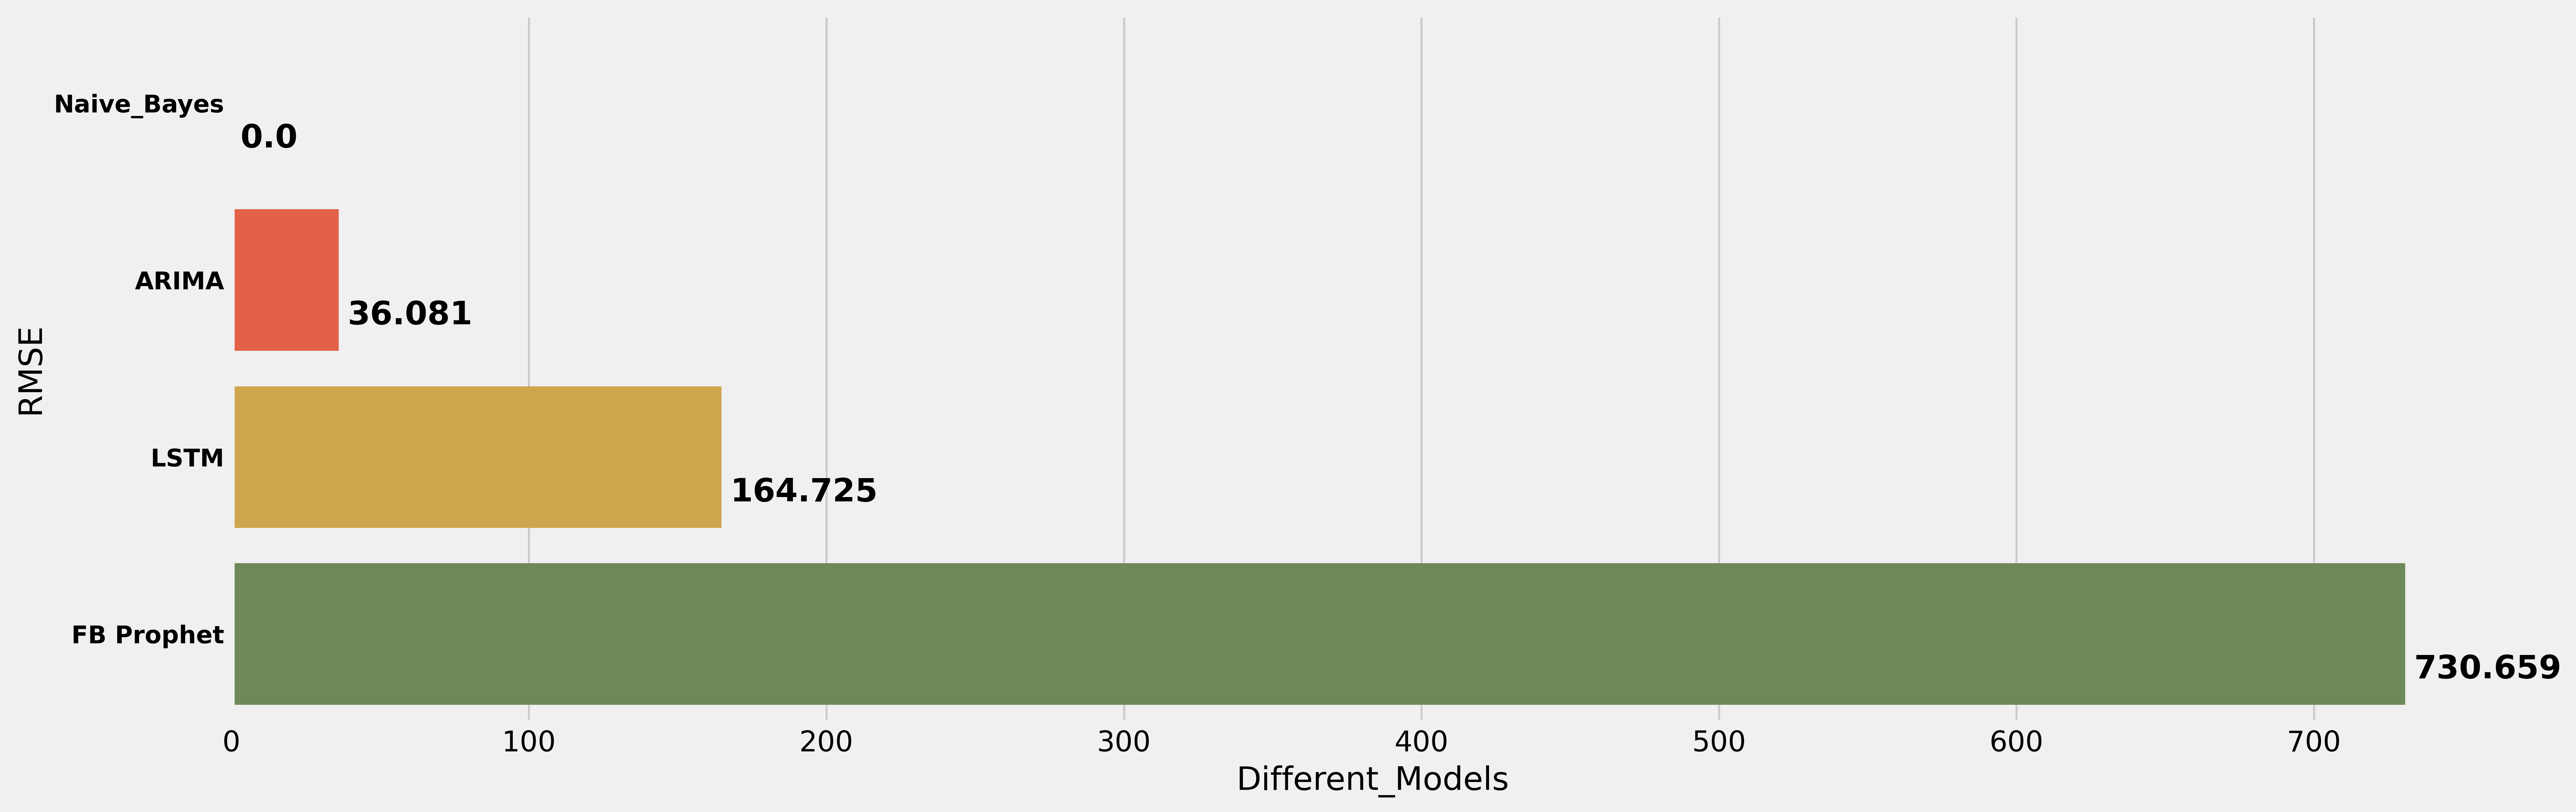

In [141]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,3)):
    axe.text(v + 3, i + .25, str(v), color = 'black', fontweight = 'bold', fontsize= 16)
plt.show()